In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.cm as cm
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

from IPython.core.pylabtools import figsize

import numpy.random as r
from pylab import *
from matplotlib.gridspec import GridSpec

import sys
sys.path.insert(0, '../../utils')
import splicing_utils as spu
import single_cell_plots as scp
from single_cell_plots import *

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["axes.facecolor"] = 'white'

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt

mpl.rcParams["mathtext.fontset"] = "stix"


# Correlation between junction coverage and unimodality

In this section we analyze the relationship between splicing junction read coverage and $\Psi$ observations in several datasets. We found that in all datasets, exons with higher average read coverage also tend to show intermediate (not 0 or 1) $\Psi$ values. This was observed in all datasets, although the proportion of unimodal exons is clearly higher in some datasets, than in others.

In [2]:
if not os.path.exists('plots'):
    os.makedirs('plots')

Load splicing junction read counts and calculate $\Psi$.

**Note:** data address refers to a directory outside of the repository with the uncompressed data files.
The repository includes the compressed data files under sc_binary_splicing/data/
To run this code and reproduce these figures, uncompress the data files in the repository and reassign the variable data_dir.

In [2]:
data_dir = '../../../data/' # adjust to the proper directory
#trapnell = spu.get_psi_table(data_dir+'trapnell/Trapnell_SJ_counts_all.tab', minJR=1, minCell=1, drop_duplicates = False)
chen = spu.get_psi_table(data_dir+'chen/Chen_SJ_counts.tab', minJR=1, minCell=1, drop_duplicates = False)
#das = spu.get_psi_table(data_dir+'das/Das_SJ_counts.tab', minJR=1, minCell=1, drop_duplicates = False)
#song = spu.get_psi_table(data_dir+'song/Song_SJ_counts.tab', minJR=1, minCell=1, drop_duplicates = False)
#lescroart = spu.get_psi_table(data_dir+'lescroart/Lescroart_SJ_counts.tab', minJR=1, minCell=1, drop_duplicates = False)

For each exon, we observe the proportion of cells that present different ranges of $\Psi$ values (histogram of $\Psi$ for each exon).

# Exon filtering (Figure 3)

In [3]:
chen_PSI = chen[3]
chen_read_counts = chen[4]

chen_meta_pseudotime = pd.read_csv('../../../data/chen/chen.meta_pseudotime.tab', sep='\t', index_col=0)
ES2i = chen_meta_pseudotime.index[chen_meta_pseudotime.cell_type == 'ES2i']
ES = chen_meta_pseudotime.index[chen_meta_pseudotime.cell_type == 'ES']
Epi = chen_meta_pseudotime.index[chen_meta_pseudotime.cell_type == 'Epi']
MN = chen_meta_pseudotime.index[chen_meta_pseudotime.cell_type == 'Motor neuron']
bio = list(ES2i) + list(ES) + list(Epi) + list(MN)
chen_tpm_tab = pd.read_csv('../../../data/chen/chen.tpm.gene_symbols.tab', sep='\t', index_col=0)[bio]
chen_star_tab = pd.read_csv('../../../data/chen/chen.star.counts.tab', sep='\t', index_col=0)[bio]
chen_rsem_tab = pd.read_csv('../../../data/chen/chen.rsemCounts.gene_symbols.tab', sep='\t', index_col=0)[bio]
chen_el = pd.read_csv('../../../data/chen/chen.effective_length.gene_symbols.tab', sep='\t', index_col=0)[bio]
crpm_chen = pd.read_csv('../../../data/chen/chen_sr_score.tab', sep='\t', index_col = 0)[bio]
chen_mrna_counts = pd.read_csv('../../../data/chen/chen_mrna_counts.tab', sep='\t', index_col=0)[bio]
chen_rsem_tab = pd.read_csv('../../../data/chen/chen.rsemCounts.gene_symbols.tab', sep='\t', index_col=0)

###############################

# lescroart_PSI = lescroart[3]
# lescroart_read_counts = lescroart[4]
# lescroart_bio = lescroart_PSI.columns
# lescroart_tpm_tab = pd.read_csv('../../../data/lescroart/Lescroart.tpm.gene_symbols.tab', sep='\t', index_col=0)[lescroart_bio]
# lescroart_star_tab = pd.read_csv('../../../data/lescroart/Lescroart.star.counts.tab', sep='\t', index_col=0)[lescroart_bio]
# lescroart_rsem_tab = pd.read_csv('../../../data/lescroart/Lescroart.rsemCounts.gene_symbols.tab', sep='\t', index_col=0)[lescroart_bio]
# lescroart_el = pd.read_csv('../../../data/lescroart/Lescroart.effective_length.gene_symbols.tab', sep='\t', index_col=0)[lescroart_bio]
# crpm_lescroart = pd.read_csv('../../../data/lescroart/lescroart_sr_score.tab', sep='\t', index_col = 0)

# ##############################

# trapnell_PSI = trapnell[3]
# trapnell_read_counts = trapnell[4]
# trapnell_bio = trapnell_PSI.columns
# trapnell_tpm_tab = pd.read_csv('../../../data/trapnell/trapnell.tpm.gene_symbols.tab', sep='\t', index_col=0)[trapnell_bio]
# trapnell_star_tab = pd.read_csv('../../../data/trapnell/trapnell.star.counts.tab', sep='\t', index_col=0)[trapnell_bio]
# trapnell_rsem_tab = pd.read_csv('../../../data/trapnell/trapnell.rsemCounts.gene_symbols.tab', sep='\t', index_col=0)[trapnell_bio]
# trapnell_el = pd.read_csv('../../../data/trapnell/trapnell.effective_length.gene_symbols.tab', sep='\t', index_col=0)[trapnell_bio]
# crpm_trapnell = pd.read_csv('../../../data/trapnell/trapnell_sr_score.tab', sep='\t', index_col = 0)


###############################

# song_PSI = song[3]
# song_read_counts = song[4]
# song_meta = pd.read_csv('../../../data/song/song_meta.tab', sep='\t', index_col=0)
# song_bio = song_meta.index[song_meta.sample_type_s == 'Single Cell']
# song_tpm_tab = pd.read_csv('../../../data/song/song.tpm.gene_symbols.tab', sep='\t', index_col=0)[song_bio]
# song_star_tab = pd.read_csv('../../../data/song/song.star.counts.tab', sep='\t', index_col=0)[song_bio]
# song_rsem_tab = pd.read_csv('../../../data/song/song.rsemCounts.gene_symbols.tab', sep='\t', index_col=0)[song_bio]
# song_el = pd.read_csv('../../../data/song/song.effective_length.gene_symbols.tab', sep='\t', index_col=0)[song_bio]
# crpm_song = pd.read_csv('../../../data/song/song_sr_score.tab', sep='\t', index_col = 0)


# ###############################

# das_PSI = das[3]
# das_read_counts = das[4]
# das_bio = das_PSI.columns
# das_tpm_tab = pd.read_csv('../../../data/das/das.tpm.gene_symbols.tab', sep='\t', index_col=0)[das_bio]
# das_star_tab = pd.read_csv('../../../data/das/das.star.counts.tab', sep='\t', index_col=0)[das_bio]
# das_rsem_tab = pd.read_csv('../../../data/das/Das.rsemCounts.gene_symbols.tab', sep='\t', index_col=0)[das_bio]
# das_el = pd.read_csv('../../../data/das/Das.effective_length.gene_symbols.tab', sep='\t', index_col=0)[das_bio]
# crpm_das = pd.read_csv('../../../data/das/das_sr_score.tab', sep='\t', index_col = 0)

In [41]:
# ### This runs the Census normalization

# chen_mrna_counts = spu.transform_tpm_to_counts(chen_tpm_tab, plot_hist = False, correct_high = True)
# print('chen')
# song_mrna_counts = spu.transform_tpm_to_counts(song_tpm_tab, plot_hist = False, correct_high = True)
# print('song')
# trapnell_mrna_counts = spu.transform_tpm_to_counts(trapnell_tpm_tab, plot_hist = False, correct_high = True)
# print('trapnell')
# lescroart_mrna_counts = spu.transform_tpm_to_counts(lescroart_tpm_tab, plot_hist = False, correct_high = True)
# print('lescroart')
# das_mrna_counts = spu.transform_tpm_to_counts(das_tpm_tab, plot_hist = False, correct_high = True)
# print('das')


# chen_mrna_counts.to_csv('../../../data/chen/chen_mrna_counts.tab', sep='\t', index=True, header=True)
# song_mrna_counts.to_csv('../../../data/song/song_mrna_counts.tab', sep='\t', index=True, header=True)
# trapnell_mrna_counts.to_csv('../../../data/trapnell/trapnell_mrna_counts.tab', sep='\t', index=True, header=True)
# das_mrna_counts.to_csv('../../../data/das/das_mrna_counts.tab', sep='\t', index=True, header=True)
# lescroart_mrna_counts.to_csv('../../../data/lescroart/lescroart_mrna_counts.tab', sep='\t', index=True, header=True)

In [4]:
# song_mrna_counts = pd.read_csv('../../../data/song/song_mrna_counts.tab', sep='\t', index_col=0)
# trapnell_mrna_counts = pd.read_csv('../../../data/trapnell/trapnell_mrna_counts.tab', sep='\t', index_col=0)
# das_mrna_counts = pd.read_csv('../../../data/das/das_mrna_counts.tab', sep='\t', index_col=0)
# lescroart_mrna_counts = pd.read_csv('../../../data/lescroart/lescroart_mrna_counts.tab', sep='\t', index_col=0)

In [4]:
# SRA tables contain information on the average spot length for each dataset

# song_srat = pd.read_csv('../../../data/song/SraRunTable.txt', sep='\t')
# song_srat = song_srat.set_index('Run_s')#.columns
chen_srat = pd.read_csv('../../../data/chen/SraRunTable.txt', sep='\t')
chen_srat = chen_srat.set_index('Run_s')#.columns
# trapnell_srat = pd.read_csv('../../../data/trapnell/SraRunTable.txt', sep='\t')
# trapnell_srat = trapnell_srat.set_index('Run')#.columns
# lescroart_srat = pd.read_csv('../../../data/lescroart/SraRunTable.txt', sep='\t')
# lescroart_srat = lescroart_srat.set_index('Run')#.columns
# das_srat = pd.read_csv('../../../data/das/SraRunTable.txt', sep='\t')
# das_srat = das_srat.set_index('Run')#.columns


In [5]:
# song_common_genes = [gene for gene in song_rsem_tab.index if ((gene in song_mrna_counts.index) & (gene in song_el.index))]
# song_cells = song_mrna_counts.columns
# song_counts_tab = song_rsem_tab.loc[song_common_genes, song_cells]
# song_mrna_tab = song_mrna_counts.loc[song_common_genes, song_cells]
# song_el_tab = song_el.loc[song_common_genes, song_cells]

# trapnell_common_genes = [gene for gene in trapnell_rsem_tab.index if ((gene in trapnell_mrna_counts.index) & (gene in trapnell_el.index))]
# trapnell_cells = trapnell_mrna_counts.columns
# trapnell_counts_tab = trapnell_rsem_tab.loc[trapnell_common_genes, trapnell_cells]
# trapnell_mrna_tab = trapnell_mrna_counts.loc[trapnell_common_genes, trapnell_cells]
# trapnell_el_tab = trapnell_el.loc[trapnell_common_genes, trapnell_cells]

# lescroart_common_genes = [gene for gene in lescroart_rsem_tab.index if ((gene in lescroart_mrna_counts.index) & (gene in lescroart_el.index))]
# lescroart_cells = lescroart_mrna_counts.columns
# lescroart_counts_tab = lescroart_rsem_tab.loc[lescroart_common_genes, lescroart_cells]
# lescroart_mrna_tab = lescroart_mrna_counts.loc[lescroart_common_genes, lescroart_cells]
# lescroart_el_tab = lescroart_el.loc[lescroart_common_genes, lescroart_cells]

# das_common_genes = [gene for gene in das_rsem_tab.index if ((gene in das_mrna_counts.index) & (gene in das_el.index))]
# das_cells = das_mrna_counts.columns
# das_counts_tab = das_rsem_tab.loc[das_common_genes, das_cells]
# das_mrna_tab = das_mrna_counts.loc[das_common_genes, das_cells]
# das_el_tab = das_el.loc[das_common_genes, das_cells]

chen_common_genes = [gene for gene in chen_rsem_tab.index if ((gene in chen_mrna_counts.index) & (gene in chen_el.index))]
chen_cells = chen_mrna_counts.columns
chen_counts_tab = chen_rsem_tab.loc[chen_common_genes, chen_cells]
chen_mrna_tab = chen_mrna_counts.loc[chen_common_genes, chen_cells]
chen_el_tab = chen_el.loc[chen_common_genes, chen_cells]

In [6]:
# song_len = song_srat.loc[song_cells, 'AvgSpotLen_l']
# das_len = das_srat.loc[das_cells, 'AvgSpotLen']
chen_len = chen_srat.loc[chen_cells, 'AvgSpotLen_l']
# trapnell_len = trapnell_srat.loc[trapnell_cells, 'AvgSpotLen']
# lescroart_len = lescroart_srat.loc[lescroart_cells, 'AvgSpotLen']

In [7]:
# song_c = ((song_counts_tab*(song_mrna_tab > 0)*song_len).sum()/(song_mrna_tab*song_el_tab).sum())
# lescroart_c = ((lescroart_counts_tab*(lescroart_mrna_tab > 0)*lescroart_len).sum()/(lescroart_mrna_tab*lescroart_el_tab).sum())
# trapnell_c = ((trapnell_counts_tab*(trapnell_mrna_tab > 0)*trapnell_len).sum()/(trapnell_mrna_tab*trapnell_el_tab).sum())
# das_c = ((das_counts_tab*(das_mrna_tab > 0)*das_len).sum()/(das_mrna_tab*das_el_tab).sum())
chen_c = ((chen_counts_tab*(chen_mrna_tab > 0)*chen_len).sum()/(chen_mrna_tab*chen_el_tab).sum())

In [8]:
chen_SR = (crpm_chen/chen_c)[chen_cells]
mrna_per_event_chen = chen_mrna_counts.loc[[x.split('_')[0] for x in chen_SR.index]]
mrna_per_event_chen.index = chen_SR.index

# song_SR = (crpm_song/song_c)[song_cells]
# mrna_per_event_song = song_mrna_counts.loc[[x.split('_')[0] for x in song_SR.index]][song_cells]
# mrna_per_event_song.index = song_SR.index

# trapnell_SR = (crpm_trapnell/trapnell_c)[trapnell_cells]
# mrna_per_event_trapnell = trapnell_mrna_counts.loc[[x.split('_')[0] for x in trapnell_SR.index]][trapnell_cells]
# mrna_per_event_trapnell.index = trapnell_SR.index

# lescroart_SR = (crpm_lescroart/lescroart_c)[lescroart_cells]
# mrna_per_event_lescroart = lescroart_mrna_counts.loc[[x.split('_')[0] for x in lescroart_SR.index]][lescroart_cells]
# mrna_per_event_lescroart.index = lescroart_SR.index

# das_SR = (crpm_das/das_c)[das_cells]
# mrna_per_event_das = das_mrna_counts.loc[[x.split('_')[0] for x in das_SR.index]]
# mrna_per_event_das.index = das_SR.index

In [9]:
chen_int_genes, chen_int_exons = spu.get_int_events(chen_PSI, chen_mrna_counts, 0.05)
chen_int_exons = [x for x in chen_int_exons if x in mrna_per_event_chen.index]

# song_int_genes, song_int_exons = spu.get_int_events(song_PSI, song_mrna_counts, 0.05)
# song_int_exons = [x for x in song_int_exons if x in mrna_per_event_song.index]

# trapnell_int_genes, trapnell_int_exons = spu.get_int_events(trapnell_PSI, trapnell_mrna_counts, 0.05)
# trapnell_int_exons = [x for x in trapnell_int_exons if x in mrna_per_event_trapnell.index]

# lescroart_int_genes, lescroart_int_exons = spu.get_int_events(lescroart_PSI, lescroart_mrna_counts, 0.05)
# lescroart_int_exons = [x for x in lescroart_int_exons if x in mrna_per_event_lescroart.index]

# das_int_genes, das_int_exons = spu.get_int_events(das_PSI, das_mrna_counts, 0.05)
# das_int_exons = [x for x in das_int_exons if x in mrna_per_event_das.index]

In [10]:
# reads_song, mrna_song, binary_song, psi_song = spu.get_dataset_averages(song_PSI, song_read_counts, 
#                                                                         song_mrna_counts, song_int_exons)
# reads_das, mrna_das, binary_das, psi_das = spu.get_dataset_averages(das_PSI, das_read_counts, 
#                                                                      das_mrna_counts, das_int_exons)
reads_chen, mrna_chen, binary_chen, psi_chen = spu.get_dataset_averages(chen_PSI, chen_read_counts, 
                                                                        chen_mrna_counts, chen_int_exons)
# reads_lescroart, mrna_lescroart, binary_lescroart, psi_lescroart = spu.get_dataset_averages(lescroart_PSI, 
#                                                                                             lescroart_read_counts, 
#                                                                                             lescroart_mrna_counts, 
#                                                                                              lescroart_int_exons)
# reads_trapnell, mrna_trapnell, binary_trapnell, psi_trapnell = spu.get_dataset_averages(trapnell_PSI, trapnell_read_counts, 
#                                                                           trapnell_mrna_counts, trapnell_int_exons)

In [11]:
chen_int = [x for x in chen_int_exons if x in mrna_per_event_chen.index]
# song_int = [x for x in song_int_exons if x in mrna_per_event_song.index]
# trapnell_int = [x for x in trapnell_int_exons if x in mrna_per_event_trapnell.index]
# lescroart_int = [x for x in lescroart_int_exons if x in mrna_per_event_lescroart.index]

chen_filter = (chen_read_counts.loc[chen_int, chen_c.index] >= (10*chen_c*(1+chen_PSI.loc[chen_int, chen_c.index])))
chen_mrna_filter = (mrna_per_event_chen.loc[chen_int, chen_c.index] >= 10)
chen_quality = ((chen_mrna_filter & chen_filter).mean(axis=1) >= 0.5)
chen_good_exons = chen_quality.loc[chen_quality].index

# song_filter = (song_read_counts.loc[song_int, song_c.index] >= (10*song_c*(1+song_PSI.loc[song_int, song_c.index])))
# song_mrna_filter = (mrna_per_event_song.loc[song_int, song_c.index] >= 10)
# song_quality = ((song_mrna_filter & song_filter).mean(axis=1) >= 0.5)
# song_good_exons = song_quality.loc[song_quality].index

# trapnell_filter = (trapnell_read_counts.loc[trapnell_int, 
#                                             trapnell_c.index] >= (10*trapnell_c*(1+trapnell_PSI.loc[trapnell_int, 
#                                                                                                     trapnell_c.index])))
# trapnell_mrna_filter = (mrna_per_event_trapnell.loc[trapnell_int, trapnell_c.index] >= 10)
# trapnell_quality = ((trapnell_mrna_filter & trapnell_filter).mean(axis=1) >= 0.5)
# trapnell_good_exons = trapnell_quality.loc[trapnell_quality].index

# lescroart_filter = (lescroart_read_counts.loc[lescroart_int, 
#                                               lescroart_c.index] >= (10*lescroart_c*(1+lescroart_PSI.loc[lescroart_int, 
#                                                                                                          lescroart_c.index])))
# lescroart_mrna_filter = (mrna_per_event_lescroart.loc[lescroart_int, lescroart_c.index] >= 10)
# lescroart_quality = ((lescroart_mrna_filter & lescroart_filter).mean(axis=1) >= 0.5)
# lescroart_good_exons = lescroart_quality.loc[lescroart_quality].index

In [12]:
chen_filter_both = (chen_filter.loc[chen_good_exons] & chen_mrna_filter.loc[chen_good_exons])
# song_filter_both = (song_filter.loc[song_good_exons] & song_mrna_filter.loc[song_good_exons])

mrna_per_event_chen_f = mrna_per_event_chen.loc[chen_good_exons].mask(~chen_filter_both)
chen_read_counts_f = chen_read_counts.loc[chen_good_exons].mask(~chen_filter_both)
chen_PSI_f = chen_PSI.loc[chen_good_exons].mask(~chen_filter_both)

# mrna_per_event_song_f = mrna_per_event_song.loc[song_good_exons].mask(~song_filter_both)
# song_read_counts_f = song_read_counts.loc[song_good_exons].mask(~song_filter_both)
# song_PSI_f = song_PSI.loc[song_good_exons].mask(~song_filter_both)



chen_filtered_binary = ((chen_PSI_f == 1) | (chen_PSI_f == 0)).sum(axis=1) / (~chen_PSI_f.isnull()).sum(axis=1)
chen_filtered_mrna_counts = mrna_per_event_chen_f.mean(axis=1)
chen_filtered_read_counts = chen_read_counts_f.mean(axis=1)

# song_filtered_binary = ((song_PSI_f == 1) | (song_PSI_f == 0)).sum(axis=1) / (~song_PSI_f.isnull()).sum(axis=1)
# song_filtered_mrna_counts = mrna_per_event_song_f.mean(axis=1)
# song_filtered_read_counts = song_read_counts_f.mean(axis=1)



In [13]:
#chen_mrna_counts

In [14]:
def filter_psi(psi_tab, int_exons, mrna_tab, cj, reads_tab, mrna_min, reads_min=0, cell_min=0.5):
    
    int_exons = [x for x in int_exons if x in mrna_tab.index]
    print(len(int_exons))
    reads_tab = reads_tab.loc[int_exons, mrna_tab.columns]
    mrna_tab = mrna_tab.loc[int_exons, mrna_tab.columns]
    cj = cj.loc[mrna_tab.columns]
    psi_tab = psi_tab.loc[int_exons, mrna_tab.columns]

    cj_filter = (reads_tab.loc[int_exons, cj.index] >= (mrna_min*cj*(1+psi_tab.loc[int_exons, cj.index])))
    mrna_filter = (mrna_tab.loc[int_exons, cj.index] >= mrna_min) & (reads_tab.loc[int_exons, cj.index] >= reads_min) #&
    quality = ((mrna_filter & cj_filter).mean(axis=1) >= cell_min)
    good_exons = quality.loc[quality].index

    filter_tab = (mrna_filter & cj_filter).loc[good_exons]
    psi_tab_mrna = psi_tab.loc[good_exons]

    print(len(good_exons))

    PSI_filtered = psi_tab_mrna
    PSI_filtered = psi_tab_mrna.mask(~filter_tab)
    PSI_filtered = PSI_filtered.dropna(how='all') # might be unnecessary
    PSI_mrna_filtered = PSI_filtered.loc[PSI_filtered.isnull().mean(axis=1) < (1-cell_min)] # might be unnecessary
    total_exons = len(PSI_mrna_filtered.index)
    
    #PSI_mrna_z = get_zscore2(PSI_mrna_filtered)

    return PSI_filtered, PSI_mrna_filtered, good_exons#, PSI_mrna_z



In [15]:
chen_PSI_filtered, chen_PSI_mrna_filtered, chen_good_exons = filter_psi(chen_PSI, chen_int_exons, 
                                                                     mrna_per_event_chen, chen_c, chen_read_counts, 15, 10)

3927
118


In [16]:
[x for x in chen_PSI_filtered.index if 'nmdSE' in x]

['Cenpa_nmdSE_1',
 'Hnrnpdl_nmdSE_1',
 'Rbm39_nmdSE_2',
 'Rbm39_nmdSE_3',
 'Srsf10_nmdSE_1',
 'Tra2b_nmdSE_1']

In [17]:
chen_PSI_filtered.loc['Srsf10_nmdSE_1'].mean()

0.2306324558308499

In [18]:
chen_pseudo_sort = chen_meta_pseudotime.pseudotime.sort_values().index

In [19]:

sf = pd.read_csv('mouse_splicing_factors.txt', sep='\t')

sf_list = [x for x in list(sf.mgi_symbol) if x in chen_mrna_counts.index]


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
from scipy.stats import pearsonr

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
def test_regression(psi_tab, mrna_tab, event, sf_list, samples = 100):
    
    sr10_psi = psi_tab.loc[event, chen_pseudo_sort].dropna().copy()

    for x in sr10_psi.index[sr10_psi >= 0.999]:
        sr10_psi.loc[x] = 0.999


    for x in sr10_psi.index[sr10_psi <= 0.001]:
        sr10_psi.loc[x] = 0.001

    sr10_sigmoid = -np.log(1/sr10_psi -1)
    
    test_size = int(len(sr10_sigmoid)/5)

    
    ##############
    
    chen_mrna_counts_sf = mrna_tab.loc[sf_list]
    chen_mrna_counts_sf = chen_mrna_counts_sf.loc[chen_mrna_counts_sf.mean(axis=1) >= 1, sr10_sigmoid.index]
    
    sf_cor = []
    sf_mse = []
    nsf_cor = []
    nsf_mse = []
    
    not_sf_list = [x for x in mrna_tab.index if x not in sf_list]
    
    counts = 0
    
    for s in range(samples):

        test_set = list(chen_mrna_counts_sf.T.sample(test_size).index)
        train_set = [x for x in chen_mrna_counts_sf.columns if x not in test_set]

        LR = LinearRegression()
        LR.fit(chen_mrna_counts_sf.T.loc[train_set], sr10_sigmoid.loc[train_set])
        sf_cor.append(pearsonr(sr10_sigmoid.loc[test_set], LR.predict(chen_mrna_counts_sf.T.loc[test_set]))[0])
        sf_mse.append(mean_squared_error(sr10_sigmoid.loc[test_set], LR.predict(chen_mrna_counts_sf.T.loc[test_set])))
        
        chen_mrna_counts_nsf = mrna_tab.loc[not_sf_list]
        chen_mrna_counts_nsf = chen_mrna_counts_nsf.loc[chen_mrna_counts_nsf.mean(axis=1) >= 1, sr10_sigmoid.index]

        random_genes = chen_mrna_counts_nsf.sample(len(sf_list))

        LR = LinearRegression()
        LR.fit(random_genes.T.loc[train_set], sr10_sigmoid.loc[train_set])
        nsf_cor.append(pearsonr(sr10_sigmoid.loc[test_set], LR.predict(random_genes.T.loc[test_set]))[0])
        nsf_mse.append(mean_squared_error(sr10_sigmoid.loc[test_set], LR.predict(random_genes.T.loc[test_set])))
        
    
        counts += 1
        
        if counts % 10 == 0:
            print(counts)
            
            print(chen_mrna_counts_sf.T.loc[train_set].shape)
            print(random_genes.T.loc[train_set].shape)
            

            
    return sf_cor, sf_mse, nsf_cor, nsf_mse

In [441]:
sf_cor, nsf_cor = test_regression(chen_PSI_filtered, chen_rsem_tab, 'Tecr_4', sf_list, samples = 100)

10
20
30
40
50
60
70
80
90
100


['Nova1', 'Nova2', 'Ptbp1', 'Ptbp2', 'Ptbp3', 'Rbfox1', 'Rbfox2', 'Srsf1', 'Srsf1', 'Srsf10', 'Srsf11', 'Srsf12', 'Srsf2', 'Srsf3', 'Srsf4', 'Srsf5', 'Srsf6', 'Srsf7', 'Srsf9', 'Mbnl2', 'Mbnl1', 'Mbnl3']
10
(345, 22)
(345, 22)
20
(345, 22)
(345, 22)
30
(345, 22)
(345, 22)
40
(345, 22)
(345, 22)
50
(345, 22)
(345, 22)
60
(345, 22)
(345, 22)
70
(345, 22)
(345, 22)
80
(345, 22)
(345, 22)
90
(345, 22)
(345, 22)
100
(345, 22)
(345, 22)
110
(345, 22)
(345, 22)
120
(345, 22)
(345, 22)
130
(345, 22)
(345, 22)
140
(345, 22)
(345, 22)
150
(345, 22)
(345, 22)


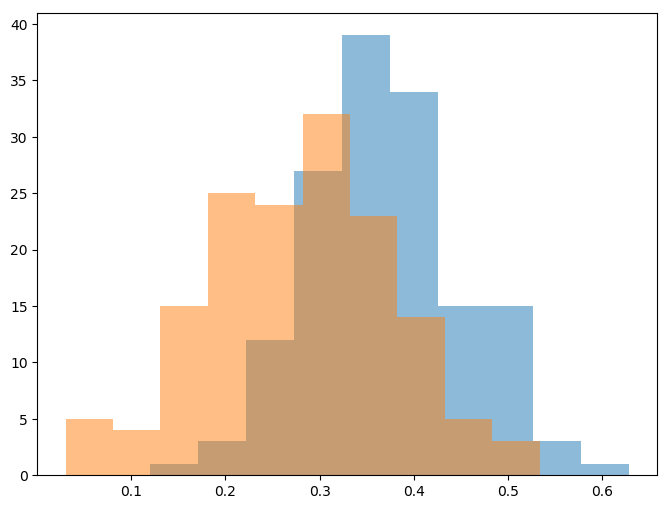

In [330]:
sf_mini = [x for x in sf_list if (('Srsf' in x) or ('Rbfox' in x) or ('Ptbp' in x) or ('Nova' in x))] + ['Mbnl2', 'Mbnl1', 'Mbnl3']
print(sf_mini)
sf_cor, sf_mse, nsf_cor, nsf_mse = test_regression(chen_PSI_filtered, chen_rsem_tab, 'Tecr_4', sf_mini, samples = 150)
plt.hist(sf_cor, alpha=0.5)
plt.hist(nsf_cor, alpha=0.5)
plt.show()

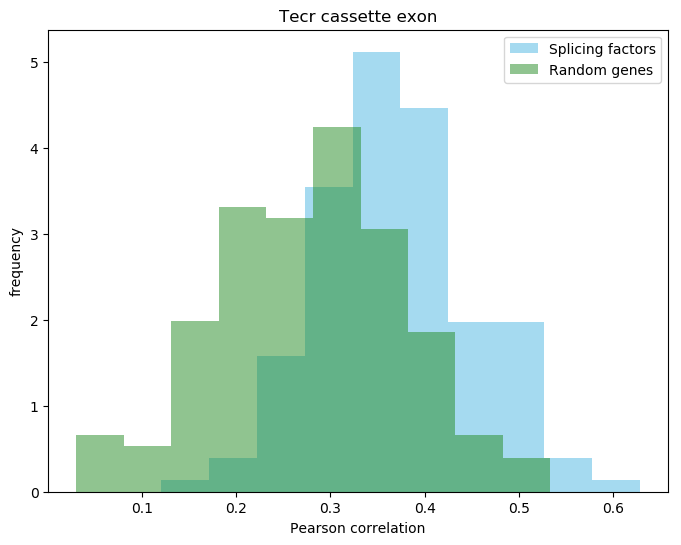

In [332]:
figsize(8,6)
plt.hist(sf_cor, alpha=0.75, color='skyblue', density=True, label='Splicing factors')
plt.hist(nsf_cor, alpha=0.5, color='forestgreen', density=True, label='Random genes')
plt.xlabel('Pearson correlation')
plt.ylabel('frequency')
plt.title('Tecr cassette exon')
plt.legend()
plt.show()

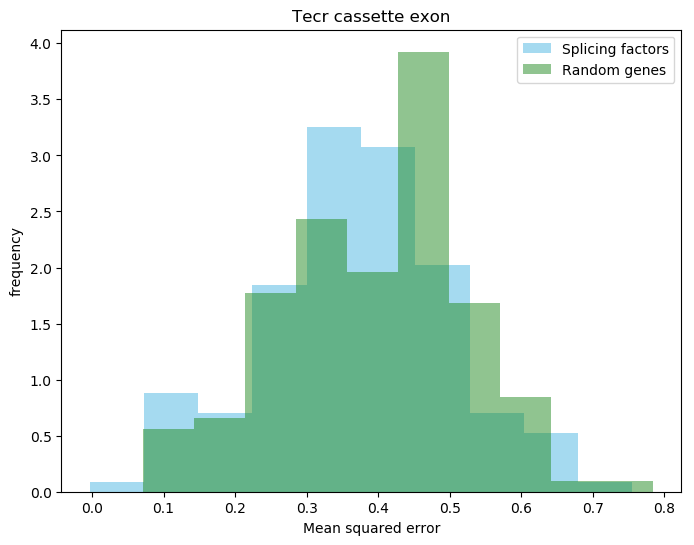

In [334]:
figsize(8,6)
plt.hist(np.log10(sf_mse), alpha=0.75, color='skyblue', density=True, label='Splicing factors')
plt.hist(np.log10(nsf_mse), alpha=0.5, color='forestgreen', density=True, label='Random genes')
plt.xlabel('Mean squared error')
plt.ylabel('frequency')
plt.title('Tecr cassette exon')
plt.legend()
plt.show()

['Nova1', 'Nova2', 'Ptbp1', 'Ptbp2', 'Ptbp3', 'Rbfox1', 'Rbfox2', 'Srsf1', 'Srsf1', 'Srsf10', 'Srsf11', 'Srsf12', 'Srsf2', 'Srsf3', 'Srsf4', 'Srsf5', 'Srsf6', 'Srsf7', 'Srsf9', 'Mbnl2', 'Mbnl1', 'Mbnl3']
10
(345, 22)
(345, 22)
20
(345, 22)
(345, 22)
30
(345, 22)
(345, 22)
40
(345, 22)
(345, 22)
50
(345, 22)
(345, 22)


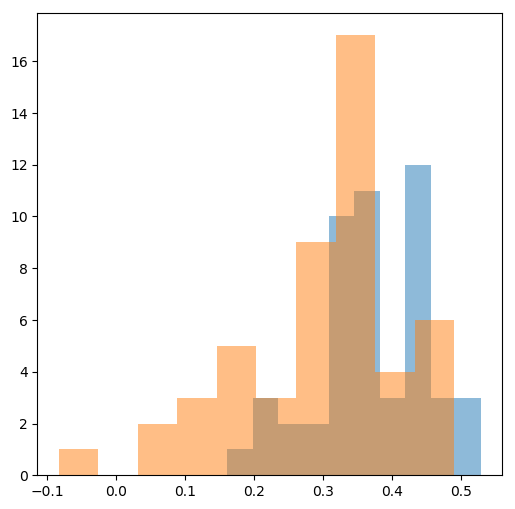

In [464]:
sf_mini = [x for x in sf_list if (('Srsf' in x) or ('Rbfox' in x) or ('Ptbp' in x) or ('Nova' in x))] + ['Mbnl2', 'Mbnl1', 'Mbnl3']
print(sf_mini)
sf_cor, nsf_cor = test_regression(chen_PSI_filtered, chen_rsem_tab, 'Tecr_4', sf_mini, samples = 50)
plt.hist(sf_cor, alpha=0.5)
plt.hist(nsf_cor, alpha=0.5)
plt.show()

['Nova1', 'Nova2', 'Ptbp1', 'Ptbp2', 'Ptbp3', 'Rbfox1', 'Rbfox2', 'Srsf1', 'Srsf1', 'Srsf10', 'Srsf11', 'Srsf12', 'Srsf2', 'Srsf3', 'Srsf4', 'Srsf5', 'Srsf6', 'Srsf7', 'Srsf9', 'Mbnl2', 'Mbnl1', 'Mbnl3']
10
(366, 22)
(366, 22)
20
(366, 22)
(366, 22)
30
(366, 22)
(366, 22)
40
(366, 22)
(366, 22)
50
(366, 22)
(366, 22)


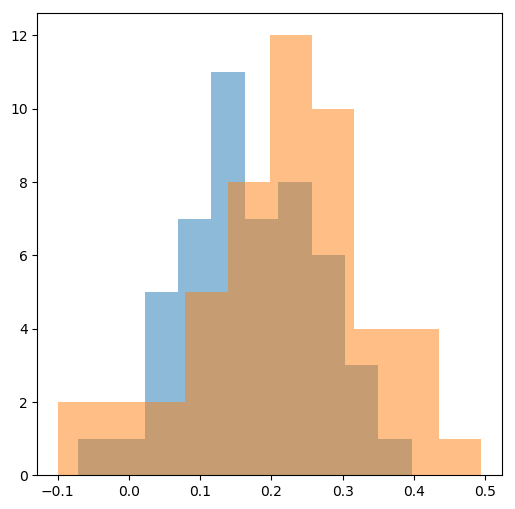

In [465]:
sf_mini = [x for x in sf_list if (('Srsf' in x) or ('Rbfox' in x) or ('Ptbp' in x) or ('Nova' in x))] + ['Mbnl2', 'Mbnl1', 'Mbnl3']
print(sf_mini)
sf_cor, nsf_cor = test_regression(chen_PSI_filtered, chen_rsem_tab, 'Rbm39_nmdSE_2', sf_mini, samples = 50)
plt.hist(sf_cor, alpha=0.5)
plt.hist(nsf_cor, alpha=0.5)
plt.show()

In [25]:
def bootstrap_regression(psi_tab, mrna_tab, event, sf_list, subsample, samples = 100):
    
    sr10_psi = psi_tab.loc[event, chen_pseudo_sort].dropna().copy()

    for x in sr10_psi.index[sr10_psi >= 0.999]:
        sr10_psi.loc[x] = 0.999


    for x in sr10_psi.index[sr10_psi <= 0.001]:
        sr10_psi.loc[x] = 0.001

    sr10_sigmoid = -np.log(1/sr10_psi -1)
    
    #test_size = int(len(sr10_sigmoid)/5)
    test_size = int(subsample/4)

    
    ##############
    
    chen_mrna_counts_sf = mrna_tab.loc[sf_list]
    #print(chen_mrna_counts_sf.index)
    chen_mrna_counts_sf = chen_mrna_counts_sf.loc[chen_mrna_counts_sf.mean(axis=1) >= 0, sr10_sigmoid.index]
    
    sf_cor = []
    sf_mse = []
    nsf_cor = []
    nsf_mse = []
        
    counts = 0
    
    sf_weight = {}
    
    for sf in sf_list:
        sf_weight.update({sf:0})
        
    
    for s in range(samples):

        test_set = list(chen_mrna_counts_sf.T.sample(test_size).index)
        train_set = [x for x in chen_mrna_counts_sf.columns if x not in test_set]
        
        train_set = chen_mrna_counts_sf.T.loc[train_set].sample(subsample).index

        
#         print(chen_mrna_counts_sf.T.loc[train_set].columns)
        LR = LinearRegression()
        LR.fit(chen_mrna_counts_sf.T.loc[train_set], sr10_sigmoid.loc[train_set])
        sf_cor.append(pearsonr(sr10_sigmoid.loc[test_set], LR.predict(chen_mrna_counts_sf.T.loc[test_set]))[0])
        sf_mse.append(mean_squared_error(sr10_sigmoid.loc[test_set], LR.predict(chen_mrna_counts_sf.T.loc[test_set])))
        
        
        for i in range(len(sf_list)):
#             print(sf_list)
#             print(len(LR.coef_))
#             print(len(sf_list))
            sf_weight[sf_list[i]] += LR.coef_[i]#/samples
        
        counts += 1
        
#         if counts % 100 == 0:
#             print(counts)
            
#             print(chen_mrna_counts_sf.T.loc[train_set].shape)
            

            
    return sf_cor, sf_mse, sf_weight

In [443]:
sf_mini = [x for x in sf_list_ if (('Srsf' in x) or ('Rbfox' in x) or ('Ptbp' in x) or ('Nova' in x) or ('Hnrnp' in x) or ('Rbm' in x) or ('Srrm' in x))] + ['Mbnl2', 'Mbnl1', 'Mbnl3']
print(sf_mini)
sf_unfilt = bootstrap_regression(chen_PSI, chen_rsem_tab, 'Srsf10_nmdSE_1', sf_mini, 236, samples = 300)
sf_filt = bootstrap_regression(chen_PSI_filtered, chen_rsem_tab, 'Srsf10_nmdSE_1', sf_mini, 236, samples = 300)
# plt.hist(sf_filt[0], alpha=0.5, c='navy')
# plt.hist(sf_unfilt[0], alpha=0.5, c='darkorange')
# plt.show()

['Hnrnpa1', 'Hnrnpa2b1', 'Hnrnpc', 'Hnrnpd', 'Hnrnpf', 'Hnrnph1', 'Hnrnph2', 'Hnrnph3', 'Hnrnpk', 'Hnrnpl', 'Hnrnpm', 'Hnrnpr', 'Hnrnpu', 'Ptbp1', 'Rbm17', 'Rbm3', 'Rbm39', 'Rbm5', 'Rbm8a', 'Srrm1', 'Srrm2', 'Srsf1', 'Srsf1', 'Srsf10', 'Srsf11', 'Srsf2', 'Srsf3', 'Srsf4', 'Srsf5', 'Srsf6', 'Srsf7', 'Srsf9', 'Mbnl2', 'Mbnl1', 'Mbnl3']


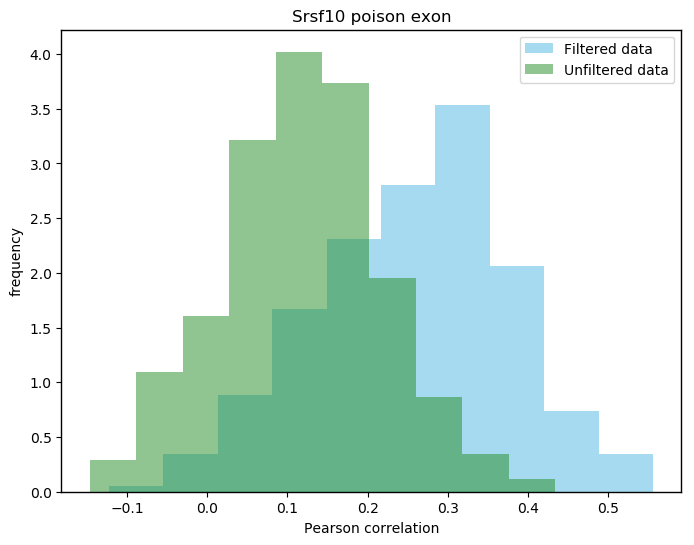

In [444]:
plt.hist(sf_filt[0], alpha=0.75, color='skyblue', density=True, label='Filtered data')
plt.hist(sf_unfilt[0], alpha=0.5, color='forestgreen', density=True, label='Unfiltered data')
plt.xlabel('Pearson correlation')
plt.ylabel('frequency')
plt.title('Srsf10 poison exon')
plt.legend()
plt.show()
plt.show()

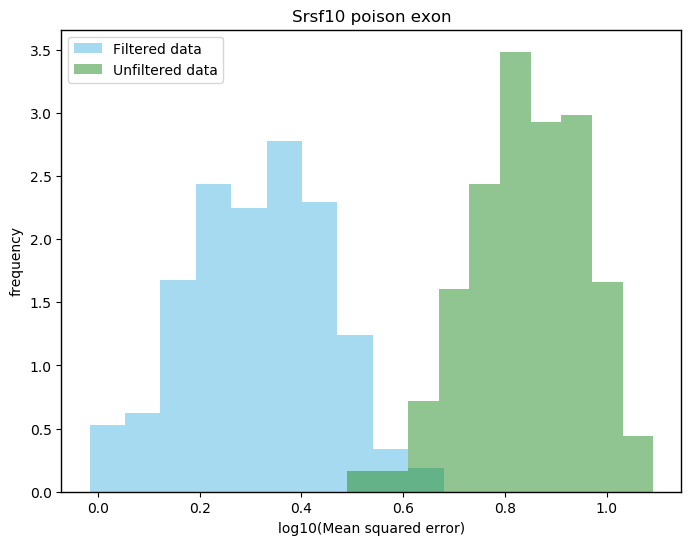

In [445]:
plt.hist(np.log10(sf_filt[1]), alpha=0.75, color='skyblue', density=True, label='Filtered data')
plt.hist(np.log10(sf_unfilt[1]), alpha=0.5, color='forestgreen', density=True, label='Unfiltered data')
plt.xlabel('log10(Mean squared error)')
plt.ylabel('frequency')
plt.title('Srsf10 poison exon')
plt.legend()
plt.show()
plt.show()

In [336]:
sf_mini = [x for x in sf_list if (('Srsf' in x) or ('Rbfox' in x) or ('Ptbp' in x) or ('Nova' in x) or ('Hnrnp' in x) or ('Rbm' in x) or ('Srrm' in x))] + ['Mbnl2', 'Mbnl1', 'Mbnl3']
print(sf_mini)
sf_unfilt = bootstrap_regression(chen_PSI, chen_rsem_tab, 'Tecr_4', sf_mini, 345, samples = 1000)
sf_filt = bootstrap_regression(chen_PSI_filtered, chen_rsem_tab, 'Tecr_4', sf_mini, 345, samples = 1000)
# plt.hist(sf_filt[0], alpha=0.5, c='navy')
# plt.hist(sf_unfilt[0], alpha=0.5, c='darkorange')
# plt.show()

['Hnrnpa0', 'Hnrnpa1', 'Hnrnpa2b1', 'Hnrnpc', 'Hnrnpd', 'Hnrnpf', 'Hnrnph1', 'Hnrnph2', 'Hnrnph3', 'Hnrnpk', 'Hnrnpl', 'Hnrnpll', 'Hnrnpm', 'Hnrnpr', 'Hnrnpu', 'Hnrnpul1', 'Nova1', 'Nova2', 'Ptbp1', 'Ptbp2', 'Ptbp3', 'Rbfox1', 'Rbfox2', 'Rbm15', 'Rbm17', 'Rbm22', 'Rbm3', 'Rbm39', 'Rbm5', 'Rbm8a', 'Rbms1', 'Rbmx', 'Rbmxl2', 'Srrm1', 'Srrm2', 'Srsf1', 'Srsf1', 'Srsf10', 'Srsf11', 'Srsf12', 'Srsf2', 'Srsf3', 'Srsf4', 'Srsf5', 'Srsf6', 'Srsf7', 'Srsf9', 'Mbnl2', 'Mbnl1', 'Mbnl3']


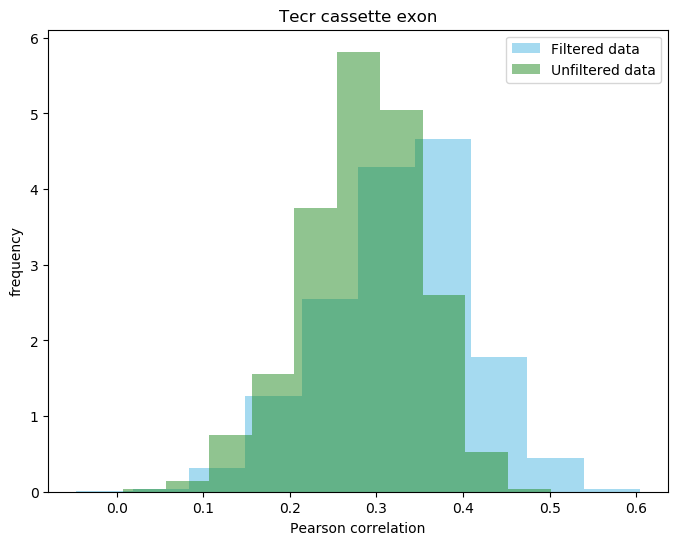

In [337]:
plt.hist(sf_filt[0], alpha=0.75, color='skyblue', density=True, label='Filtered data')
plt.hist(sf_unfilt[0], alpha=0.5, color='forestgreen', density=True, label='Unfiltered data')
plt.xlabel('Pearson correlation')
plt.ylabel('frequency')
plt.title('Tecr cassette exon')
plt.legend()
plt.show()
plt.show()

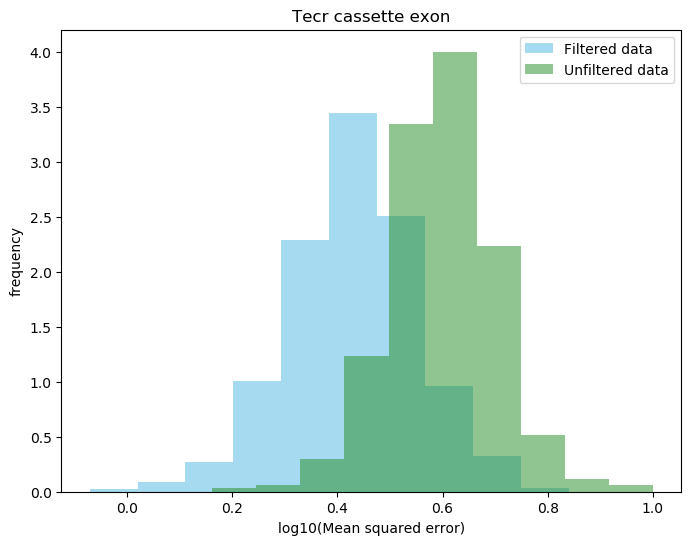

In [338]:
plt.hist(np.log10(sf_filt[1]), alpha=0.75, color='skyblue', density=True, label='Filtered data')
plt.hist(np.log10(sf_unfilt[1]), alpha=0.5, color='forestgreen', density=True, label='Unfiltered data')
plt.xlabel('log10(Mean squared error)')
plt.ylabel('frequency')
plt.title('Tecr cassette exon')
plt.legend()
plt.show()
plt.show()

In [318]:
llaves = sf_filt[2].keys()
valores = [sf_filt[2][llave] for llave in llaves]

pd_weights = pd.DataFrame()
pd_weights['rbps'] = llaves
pd_weights['weight'] = valores
pd_weights = pd_weights.sort_values('weight')
pd_weights.index = range(len(pd_weights))

In [319]:
-np.log(1/0.999 -1)

6.906754778648465

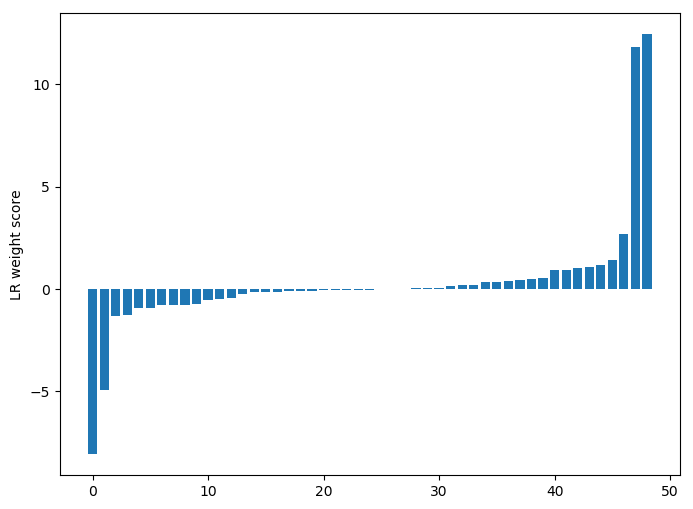

In [324]:
plt.bar(range(len(pd_weights)), list(pd_weights.weight))
plt.ylabel('LR weight score')
plt.show()

In [323]:
pd_weights

,rbps,weight
0,Rbmxl2,-8.070776
1,Nova1,-4.913132
2,Rbm22,-1.305855
3,Rbm15,-1.262339
4,Rbmx,-0.942444
5,Srsf12,-0.934434
6,Rbm8a,-0.800989
7,Rbm17,-0.788164
8,Srsf1,-0.785750
9,Rbfox2,-0.748176


In [52]:
sf_mini = [x for x in sf_list if (('Srsf' in x) or ('Rbfox' in x) or ('Ptbp' in x) or ('Nova' in x) or ('Hnrnp' in x) or ('Rbm' in x) or ('Srrm' in x))] + ['Mbnl2', 'Mbnl1', 'Mbnl3']
print(sf_mini)
sf_unfilt = bootstrap_regression(chen_PSI, chen_mrna_counts, 'Srsf10_nmdSE_1', sf_mini, 236, samples = 1000)
sf_filt = bootstrap_regression(chen_PSI_filtered, chen_mrna_counts, 'Srsf10_nmdSE_1', sf_mini, 236, samples = 1000)
# plt.hist(sf_filt[0], alpha=0.5, c='navy')
# plt.hist(sf_unfilt[0], alpha=0.5, c='darkorange')
# plt.show()

['Hnrnpa0', 'Hnrnpa1', 'Hnrnpa2b1', 'Hnrnpc', 'Hnrnpd', 'Hnrnpf', 'Hnrnph1', 'Hnrnph2', 'Hnrnph3', 'Hnrnpk', 'Hnrnpl', 'Hnrnpll', 'Hnrnpm', 'Hnrnpr', 'Hnrnpu', 'Hnrnpul1', 'Nova1', 'Nova2', 'Ptbp1', 'Ptbp2', 'Ptbp3', 'Rbfox1', 'Rbfox2', 'Rbm15', 'Rbm17', 'Rbm22', 'Rbm3', 'Rbm39', 'Rbm5', 'Rbm8a', 'Rbms1', 'Rbmx', 'Rbmxl2', 'Srrm1', 'Srrm2', 'Srsf1', 'Srsf1', 'Srsf10', 'Srsf11', 'Srsf12', 'Srsf2', 'Srsf3', 'Srsf4', 'Srsf5', 'Srsf6', 'Srsf7', 'Srsf9', 'Mbnl2', 'Mbnl1', 'Mbnl3']
100
(236, 50)
200
(236, 50)
300
(236, 50)
400
(236, 50)
500
(236, 50)
600
(236, 50)
700
(236, 50)
800
(236, 50)
900
(236, 50)
1000
(236, 50)
100
(236, 50)
200
(236, 50)
300
(236, 50)
400
(236, 50)
500
(236, 50)
600
(236, 50)
700
(236, 50)
800
(236, 50)
900
(236, 50)
1000
(236, 50)


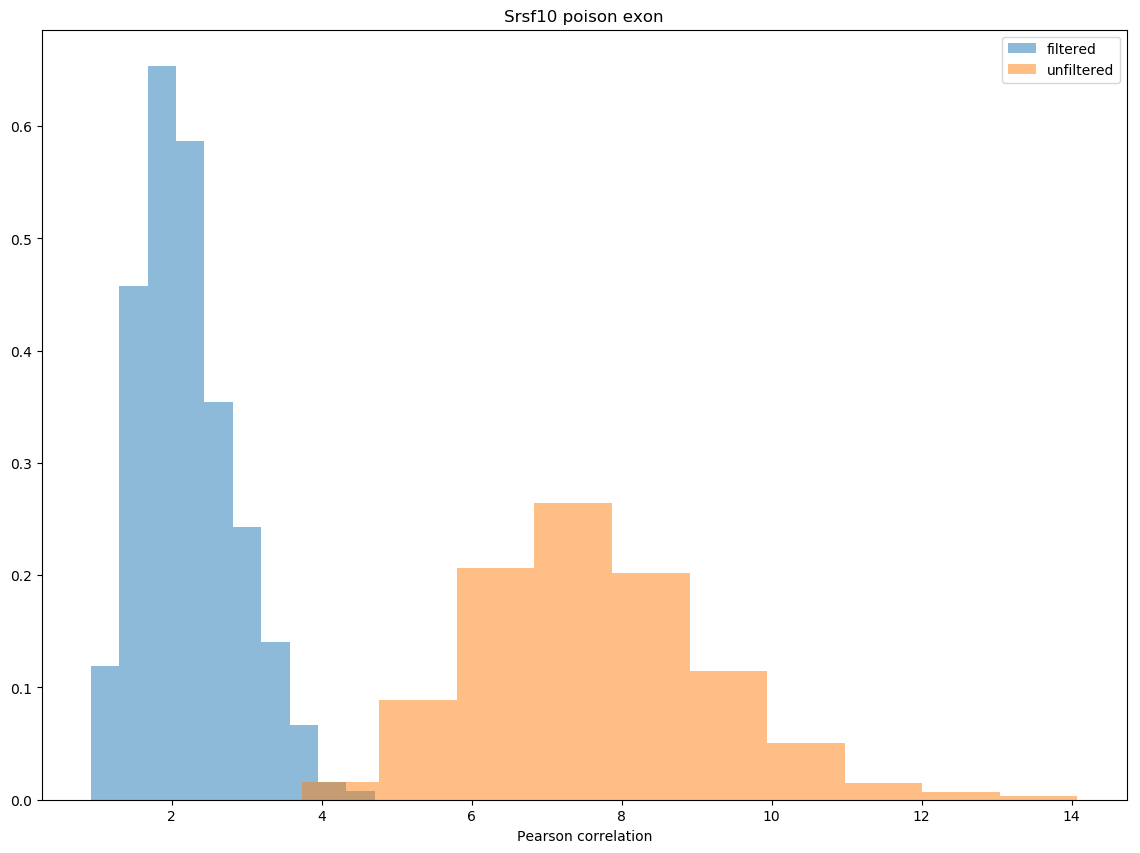

In [53]:
plt.hist(sf_filt[0], alpha=0.5, density=True, label='filtered')
plt.hist(sf_unfilt[0], alpha=0.5, density=True, label='unfiltered')
plt.title('Srsf10 poison exon')
plt.xlabel('Pearson correlation')
plt.legend()
plt.show()

In [544]:
sf_filt[1]

{'Hnrnpa0': 6.647572857875584,
 'Hnrnpa1': 0.5575642088059721,
 'Hnrnpa2b1': -2.4765270053728603,
 'Hnrnpc': -9.813873215987115,
 'Hnrnpd': 12.863047608634231,
 'Hnrnpf': -1.104867094252728,
 'Hnrnph1': 4.235352949524885,
 'Hnrnph2': -4.084003523533552,
 'Hnrnph3': -27.20282133955591,
 'Hnrnpk': 0.2336912519042249,
 'Hnrnpl': 13.655893467306447,
 'Hnrnpll': -37.12014085035538,
 'Hnrnpm': -0.07279490122645635,
 'Hnrnpr': 16.230199285928602,
 'Hnrnpu': 6.574256279128963,
 'Hnrnpul1': -25.257876073496092,
 'Nova1': -317.4402933035667,
 'Nova2': 1136.4419832690942,
 'Ptbp1': 3.118245196805143,
 'Ptbp2': -35.49976090283028,
 'Ptbp3': -21.9982209176871,
 'Rbfox1': 360.5078635674216,
 'Rbfox2': -25.563834544824708,
 'Rbm15': -152.6825402356069,
 'Rbm17': -8.469409544901684,
 'Rbm22': -26.43383690640529,
 'Rbm3': -2.1547914008510576,
 'Rbm39': -1.758956620024361,
 'Rbm5': -3.80930588705783,
 'Rbm8a': -3.3382086473071126,
 'Rbms1': -0.135599658352461,
 'Rbmx': -12.616525851765521,
 'Rbmxl2': -1

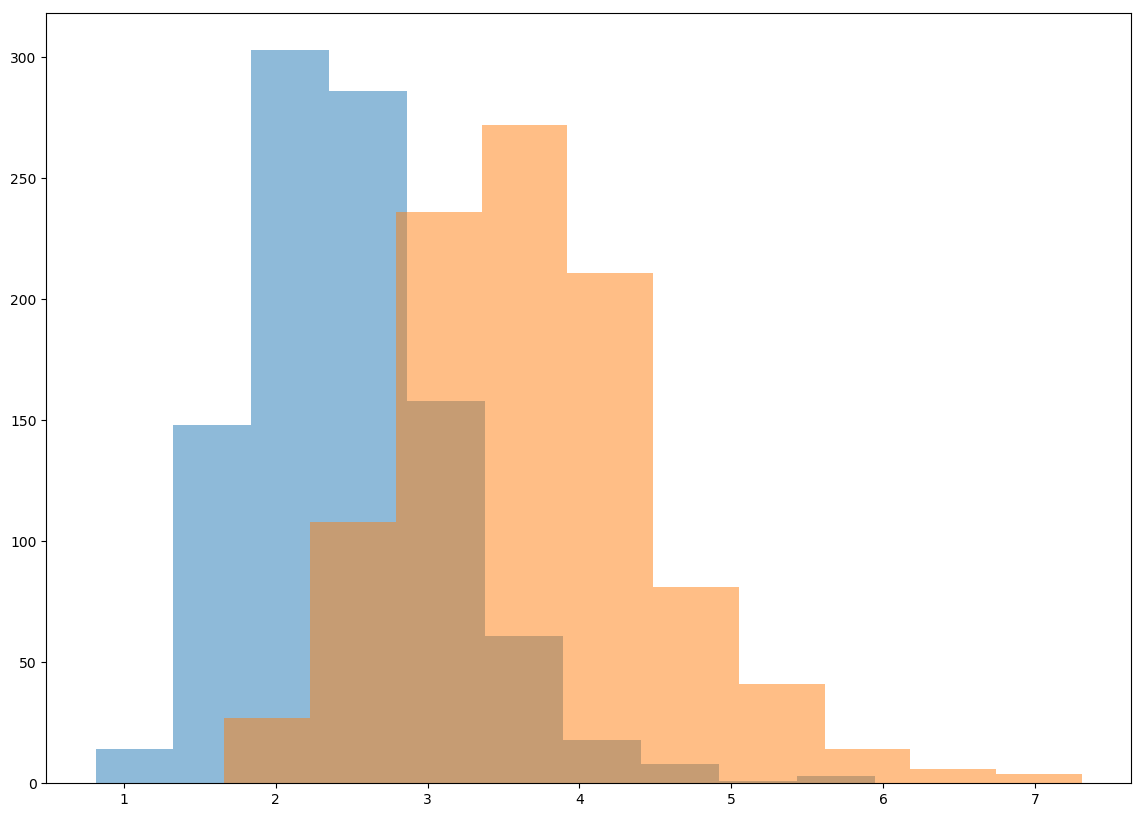

In [56]:
# sf_mini = [x for x in sf_list if (('Srsf' in x) or ('Rbfox' in x) or ('Ptbp' in x) or ('Nova' in x))] + ['Mbnl2', 'Mbnl1', 'Mbnl3']
# print(sf_mini)
# sf_unfilt = bootstrap_regression(chen_PSI, chen_rsem_tab, 'Tecr_4', sf_mini, 345, samples = 1000)
# sf_filt = bootstrap_regression(chen_PSI_filtered, chen_rsem_tab, 'Tecr_4', sf_mini, 345, samples = 1000)
plt.hist(sf_filt[0], alpha=0.5)
plt.hist(sf_unfilt[0], alpha=0.5)
plt.show()

['Hnrnpa0', 'Hnrnpa1', 'Hnrnpa2b1', 'Hnrnpc', 'Hnrnpd', 'Hnrnpf', 'Hnrnph1', 'Hnrnph2', 'Hnrnph3', 'Hnrnpk', 'Hnrnpl', 'Hnrnpll', 'Hnrnpm', 'Hnrnpr', 'Hnrnpu', 'Hnrnpul1', 'Nova1', 'Nova2', 'Ptbp1', 'Ptbp2', 'Ptbp3', 'Rbfox1', 'Rbfox2', 'Rbm15', 'Rbm17', 'Rbm22', 'Rbm3', 'Rbm39', 'Rbm5', 'Rbm8a', 'Rbms1', 'Rbmx', 'Rbmxl2', 'Srrm1', 'Srrm2', 'Srsf1', 'Srsf1', 'Srsf10', 'Srsf11', 'Srsf12', 'Srsf2', 'Srsf3', 'Srsf4', 'Srsf5', 'Srsf6', 'Srsf7', 'Srsf9', 'Mbnl2', 'Mbnl1', 'Mbnl3']


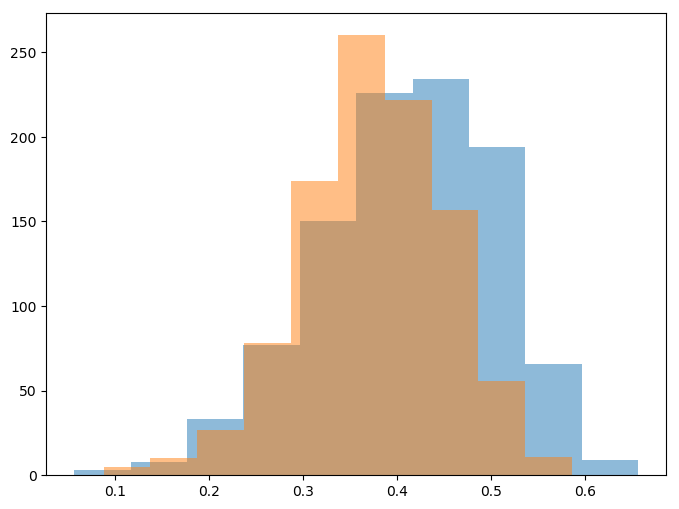

In [325]:
#sf_mini = [x for x in sf_list if (('Srsf' in x) or ('Rbfox' in x) or ('Ptbp' in x) or ('Nova' in x))] + ['Mbnl2', 'Mbnl1', 'Mbnl3']
print(sf_mini)
sf_unfilt = bootstrap_regression(chen_PSI, chen_mrna_counts, 'Tecr_4', sf_mini, 345, samples = 1000)
sf_filt = bootstrap_regression(chen_PSI_filtered, chen_mrna_counts, 'Tecr_4', sf_mini, 345, samples = 1000)
plt.hist(sf_filt[0], alpha=0.5)
plt.hist(sf_unfilt[0], alpha=0.5)
plt.show()

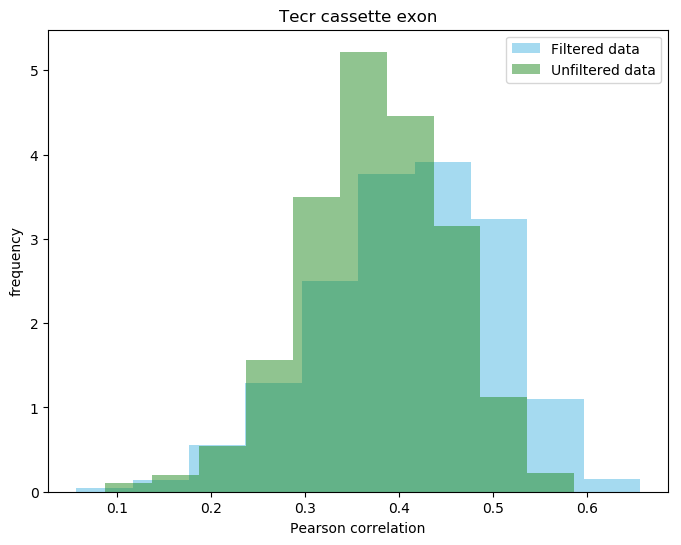

In [328]:
plt.hist(sf_filt[0], alpha=0.75, color='skyblue', density=True, label='Filtered data')
plt.hist(sf_unfilt[0], alpha=0.5, color='forestgreen', density=True, label='Unfiltered data')
plt.xlabel('Pearson correlation')
plt.ylabel('frequency')
plt.title('Tecr cassette exon')
plt.legend()
plt.show()
plt.show()

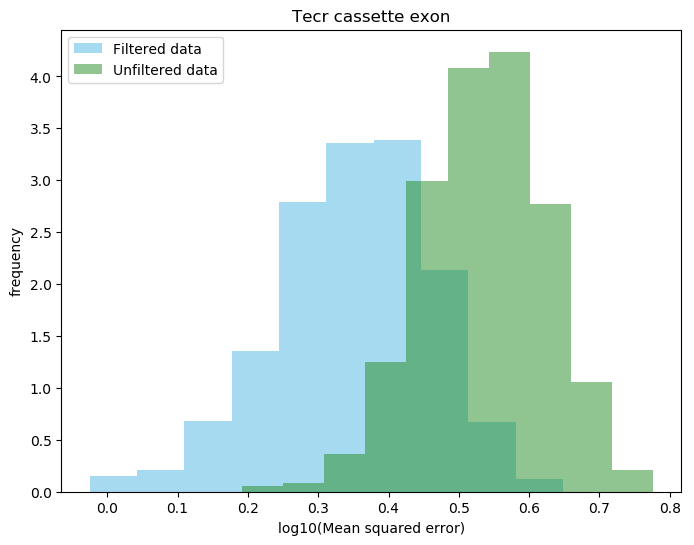

In [329]:
plt.hist(np.log10(sf_filt[1]), alpha=0.75, color='skyblue', density=True, label='Filtered data')
plt.hist(np.log10(sf_unfilt[1]), alpha=0.5, color='forestgreen', density=True, label='Unfiltered data')
plt.xlabel('log10(Mean squared error)')
plt.ylabel('frequency')
plt.title('Tecr cassette exon')
plt.legend()
plt.show()
plt.show()

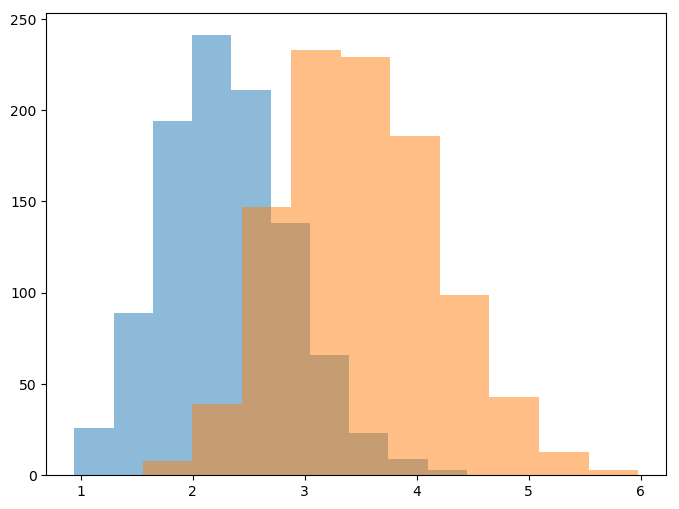

In [326]:
plt.hist(sf_filt[1], alpha=0.5)
plt.hist(sf_unfilt[1], alpha=0.5)
plt.show()

In [96]:
llaves = sf_filt[2].keys()
valores = [sf_filt[2][llave] for llave in llaves]

pd_weights = pd.DataFrame()
pd_weights['rbps'] = llaves
pd_weights['weight'] = valores
pd_weights = pd_weights.sort_values('weight')
pd_weights.index = range(len(pd_weights))

In [100]:
pd_weights.set_index('rbps')

,weight
rbps,
Nova2,-379.850764
Nova1,-282.350968
Rbfox2,-159.007211
Rbfox1,-154.069499
Mbnl3,-93.638864
Rbm15,-57.033942
Mbnl2,-36.753588
Rbm22,-33.792609
Mbnl1,-28.780186


['Hnrnpa0', 'Hnrnpa1', 'Hnrnpa2b1', 'Hnrnpc', 'Hnrnpd', 'Hnrnpf', 'Hnrnph1', 'Hnrnph2', 'Hnrnph3', 'Hnrnpk', 'Hnrnpl', 'Hnrnpll', 'Hnrnpm', 'Hnrnpr', 'Hnrnpu', 'Hnrnpul1', 'Nova1', 'Nova2', 'Ptbp1', 'Ptbp2', 'Ptbp3', 'Rbfox1', 'Rbfox2', 'Mbnl2', 'Mbnl1', 'Mbnl3']
100
(200, 26)
200
(200, 26)
300
(200, 26)
400
(200, 26)
500
(200, 26)
600
(200, 26)
700
(200, 26)
800
(200, 26)
900
(200, 26)
1000
(200, 26)
100
(200, 26)
200
(200, 26)
300
(200, 26)
400
(200, 26)
500
(200, 26)
600
(200, 26)
700
(200, 26)
800
(200, 26)
900
(200, 26)
1000
(200, 26)


TypeError: '>' not supported between instances of 'float' and 'dict'

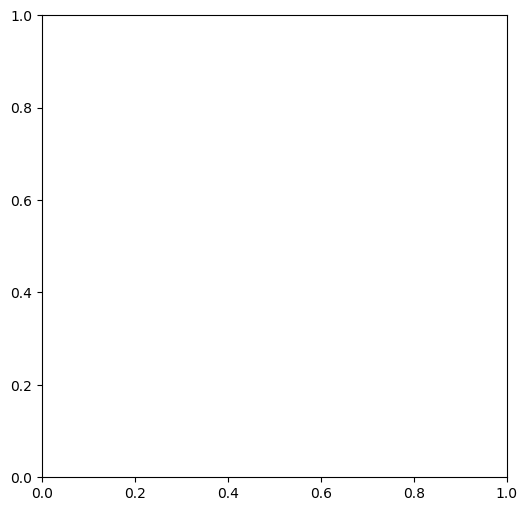

In [547]:
sf_mini = [x for x in sf_list if (('Hnrnp' in x) or ('Rbfox' in x) or ('Ptbp' in x) or ('Nova' in x))] + ['Mbnl2', 'Mbnl1', 'Mbnl3']
print(sf_mini)
sf_unfilt = bootstrap_regression(chen_PSI, chen_mrna_counts, 'Hnrnph1_1', sf_mini, 200, samples = 1000)
sf_filt = bootstrap_regression(chen_PSI_filtered, chen_mrna_counts, 'Hnrnph1_1', sf_mini, 200, samples = 1000)
plt.hist(sf_filt, alpha=0.5)
plt.hist(sf_unfilt, alpha=0.5)
plt.show()

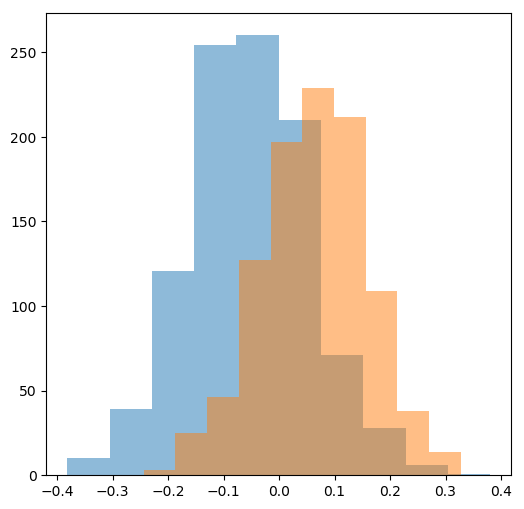

In [548]:
plt.hist(sf_filt[0], alpha=0.5)
plt.hist(sf_unfilt[0], alpha=0.5)
plt.show()

In [549]:
sf_filt[1]

{'Hnrnpa0': -52.71635914316426,
 'Hnrnpa1': 0.518707827346281,
 'Hnrnpa2b1': -1.2280921750790015,
 'Hnrnpc': 11.92457398772873,
 'Hnrnpd': -2.44785023136053,
 'Hnrnpf': 2.1728661202626083,
 'Hnrnph1': 2.6996567387934878,
 'Hnrnph2': 5.066904961261656,
 'Hnrnph3': 2.312525735966266,
 'Hnrnpk': -5.847548960490927,
 'Hnrnpl': -5.6331157001499,
 'Hnrnpll': -5.794415399399744,
 'Hnrnpm': -6.677000216957312,
 'Hnrnpr': 20.70439811938349,
 'Hnrnpu': 4.287558488705475,
 'Hnrnpul1': -19.525227941476984,
 'Nova1': 555.2506865843285,
 'Nova2': -940.5404973615845,
 'Ptbp1': 1.745435668734389,
 'Ptbp2': -15.82940222805734,
 'Ptbp3': -22.05074523211551,
 'Rbfox1': -183.75384678637366,
 'Rbfox2': 131.13828934021012,
 'Mbnl2': -115.88426103085234,
 'Mbnl1': 69.6690756154235,
 'Mbnl3': -98.04386983230648}

In [491]:
chen_PSI_filtered.loc['Eif4a2_1'].dropna()

65

In [106]:
def get_weights(PSI, counts, sf_list):
    sf_dict = {'exons':[]}
    for sf in sf_list:
        sf_dict.update({sf:[]})
    for exon in PSI.index:
        total_cells = int(4*(len(PSI.loc[exon].dropna())/5))
        sf_filt = bootstrap_regression(PSI, counts, exon, sf_list, total_cells, samples = 1000)
        
        
        llaves = sf_filt[2].keys()
        valores = [sf_filt[2][llave] for llave in llaves]

        pd_weights = pd.DataFrame()
        pd_weights['rbps'] = llaves
        pd_weights['weight'] = valores
        pd_weights = pd_weights.sort_values('weight')
        pd_weights = pd_weights.set_index('rbps')
        
        sf_dict['exons'].append(exon)
        for sf in sf_list:
            sf_dict[sf].append(pd_weights.loc[sf, 'weight'])
            
        print(exon)
    return sf_dict

In [109]:
sf_dict = get_weights(chen_PSI_filtered, chen_mrna_counts, sf_mini)

0610010K14Rik_3
0610010K14Rik_4
0610010K14Rik_6
1110038B12Rik_1
1110038B12Rik_8
Atp5j_1
Birc5_1
Cct4_5
Cdc123_3
Cdc26_1
Cdk4_1
Cenpa_6
Cenpa_nmdSE_1
Chmp2a_2
Chtop_2
Clta_4
Csde1_2
Csnk1a1_3
Cuta_2
Dkc1_8
Dnajc19_1
Dph3_1
Dph3_2
Eef1d_3
Eif3k_1
Eif3k_4
Eif4a2_1
Eif4e2_1
Eif4g2_1
Eif4h_1
Eif5a_1
Erh_1
Fis1_3
Fmr1nb_1
G3bp2_1
Gas5_2
Gas5_4
Gm14406_1
Gm14406_2
H2afv_2
Hnrnpa1_2
Hnrnpa2b1_1
Hnrnpa2b1_2
Hnrnpa2b1_4
Hnrnpab_1
Hnrnpc_1
Hnrnpd_3
Hnrnpdl_nmdSE_1
Hnrnpf_5
Hnrnph1_1
Hnrnph1_5
Hnrnph1_6
Hnrnpk_2
Hnrnpk_5
Idh3g_1
Kars_1
Knop1_3
Lsm6_2
Lyar_4
Lyar_5
Mpdu1_2
Mrpl30_3
Mrpl55_1
Mtch2_1
Mtch2_2
Nasp_1
Ndufa7_1
Ndufs7_3
Nop56_2
Nop58_14
Nop58_4
Nsfl1c_2
Nubp2_1
Orc6_2
Pcbp2_2
Pdcd2l_1
Pla2g1b_2
Pop5_1
Psmg4_1
Ptbp1_6
Rab7_2
Rbm39_nmdSE_2
Rbm39_nmdSE_3
Rer1_2
Rer1_3
Rnps1_4
Rpn2_1
Rpp21_1
Ruvbl2_2
Siva1_1
Slc25a39_6
Snhg5_5
Spint2_2
Srp9_1
Srsf10_nmdSE_1
Srsf7_3
St13_4
Sumo1_1
Sumo2_1
Tcp1_1
Tecr_4
Thyn1_1
Tmem126a_2
Tmem14c_2
Tomm5_1
Tpd52l2_4
Tpd52l2_7
Tpm1_8
Tra2b_nmdSE_1
U2surp_2
Ube2

In [114]:
for i in sf_dict.keys():
    if len(sf_dict[i]) > 120:
        print(i)

Srsf1


In [123]:
sf_dict['Srsf1'] = sf_dict['Srsf1'][:118]

In [127]:
rbp_scores = pd.DataFrame.from_dict(sf_dict).set_index('exons')

In [135]:
from sklearn.decomposition import PCA

In [177]:
pca_rbp = PCA(n_components=2)

In [348]:
X = pca_rbp.fit_transform(rbp_scores.T)

In [353]:
colores = ['red' if ('Nova' in x) else 'navy' for x in rbp_scores.columns]

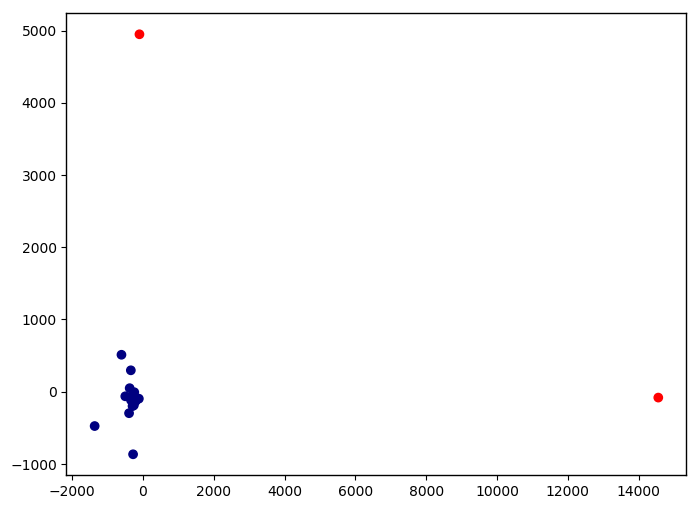

In [354]:
plt.scatter(X.T[0], X.T[1], c=colores)
plt.show()

In [170]:
rbps_no_nova = [x for x in rbp_scores.columns if 'Nova' not in x]

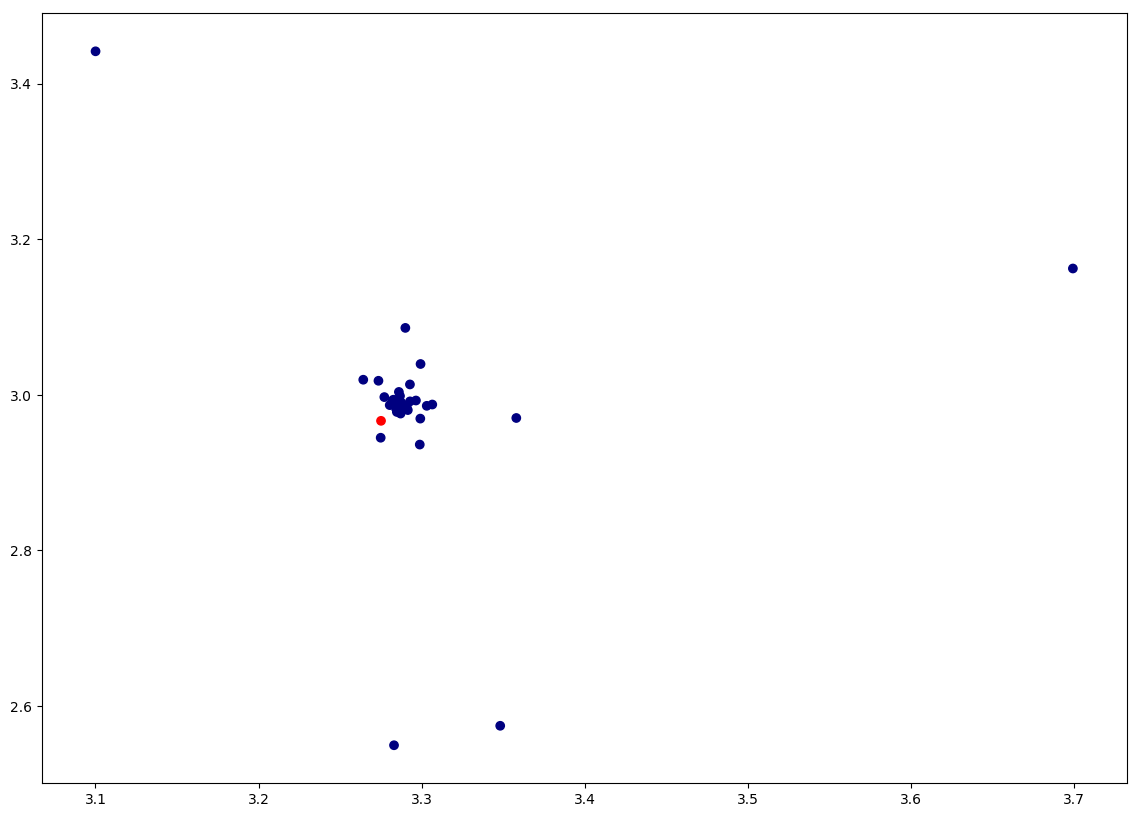

In [183]:
X = pca_rbp.fit_transform(rbp_scores[rbps_no_nova].T)
colores = ['red' if ('Rbfox' in x) else 'navy' for x in rbp_scores.columns]

plt.scatter(np.log10(X.T[0]+2000), np.log10(X.T[1]+1000), c=colores)
plt.show()

In [344]:
good_cells = [x for x in chen_rsem_tab.loc['Srsf3'].sort_values().index if x in chen_PSI_filtered.loc['Srsf10_nmdSE_1'].dropna().index]

In [345]:
len(good_cells)/2

147.5

In [346]:
low_sr3 = good_cells[:int(len(good_cells)/4)]
high_sr3 = good_cells[-int(len(good_cells)/4):]

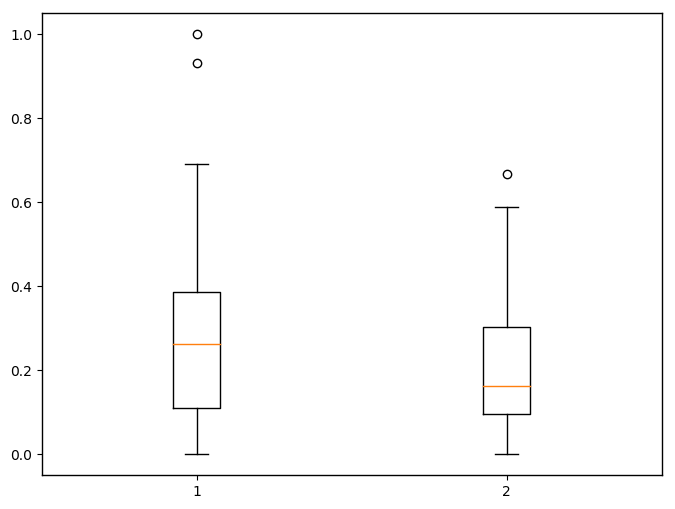

In [347]:
plt.boxplot([chen_PSI_filtered.loc['Srsf10_nmdSE_1', low_sr3], [chen_PSI_filtered.loc['Srsf10_nmdSE_1', high_sr3]]])
plt.show()

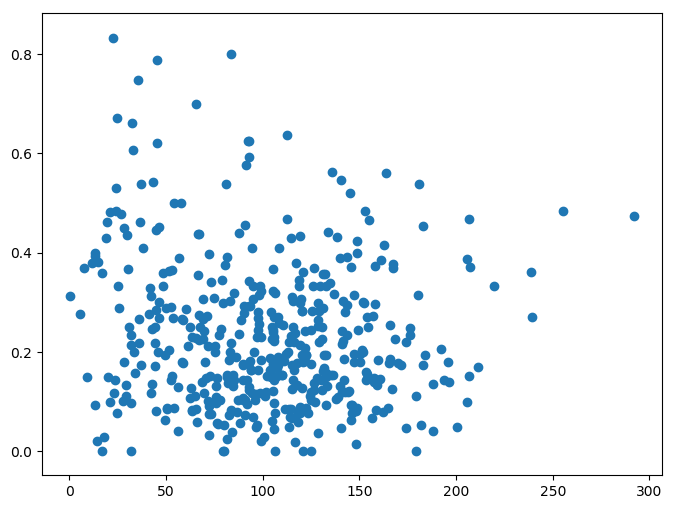

In [278]:
plt.scatter(chen_mrna_counts.loc['Srsf3'], chen_PSI_filtered.loc['Rbm39_nmdSE_2'])

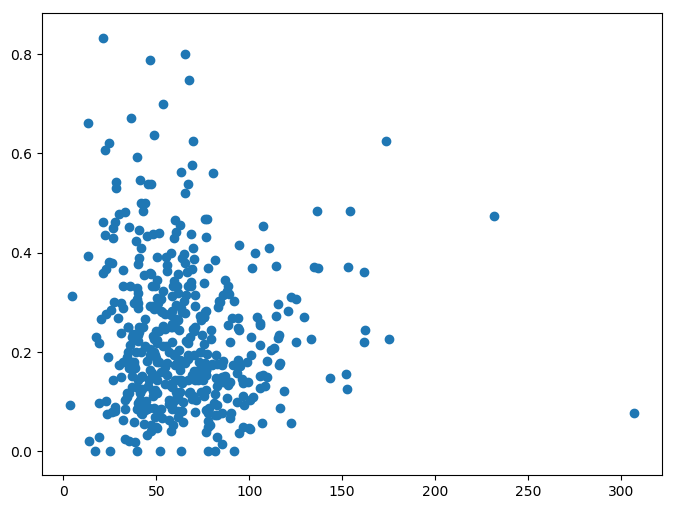

In [279]:
plt.scatter(chen_mrna_counts.loc['Rbm39'], chen_PSI_filtered.loc['Rbm39_nmdSE_2'])

In [415]:
#chen_PSI[list(ES2i)+list(ES)]
chen_pseudo_sort = [x for x in chen_pseudo_sort if x in list(ES2i)+list(ES)]

In [416]:
[x for x in sf_mini if x in sf_list_]

['Hnrnpa1',
 'Hnrnpa2b1',
 'Hnrnpc',
 'Hnrnpd',
 'Hnrnpf',
 'Hnrnph1',
 'Hnrnph2',
 'Hnrnph3',
 'Hnrnpk',
 'Hnrnpl',
 'Hnrnpm',
 'Hnrnpr',
 'Hnrnpu',
 'Ptbp1',
 'Rbm17',
 'Rbm3',
 'Rbm39',
 'Rbm5',
 'Rbm8a',
 'Srrm1',
 'Srrm2',
 'Srsf1',
 'Srsf1',
 'Srsf10',
 'Srsf11',
 'Srsf2',
 'Srsf3',
 'Srsf5',
 'Srsf6',
 'Srsf7',
 'Srsf9']

In [53]:
sf_list_ = [x for x in sf_list if x in chen_mrna_counts.loc[chen_mrna_counts[Epi].median(axis=1) >= 10].index]

sf_mini = [x for x in sf_list if (('Srsf' in x) or ('Rbfox' in x) or ('Ptbp' in x) or ('Nova' in x) or ('Hnrnp' in x) or ('Rbm' in x) or ('Srrm' in x))] + ['Mbnl2', 'Mbnl1', 'Mbnl3']
print(sf_mini)
sf_unfilt = bootstrap_regression(chen_PSI[list(ES2i)+list(ES)], chen_mrna_counts[list(ES2i)+list(ES)], 
                                 'Srsf10_nmdSE_1', [x for x in sf_mini if x in sf_list_], 100, samples = 300)
sf_filt = bootstrap_regression(chen_PSI_filtered[list(ES2i)+list(ES)], chen_mrna_counts[list(ES2i)+list(ES)], 
                               'Srsf10_nmdSE_1', [x for x in sf_mini if x in sf_list_], 100, samples = 300)
# plt.hist(sf_filt[0], alpha=0.5, c='navy')
# plt.hist(sf_unfilt[0], alpha=0.5, c='darkorange')
# plt.show()

['Hnrnpa0', 'Hnrnpa1', 'Hnrnpa2b1', 'Hnrnpc', 'Hnrnpd', 'Hnrnpf', 'Hnrnph1', 'Hnrnph2', 'Hnrnph3', 'Hnrnpk', 'Hnrnpl', 'Hnrnpll', 'Hnrnpm', 'Hnrnpr', 'Hnrnpu', 'Hnrnpul1', 'Nova1', 'Nova2', 'Ptbp1', 'Ptbp2', 'Ptbp3', 'Rbfox1', 'Rbfox2', 'Rbm15', 'Rbm17', 'Rbm22', 'Rbm3', 'Rbm39', 'Rbm5', 'Rbm8a', 'Rbms1', 'Rbmx', 'Rbmxl2', 'Srrm1', 'Srrm2', 'Srsf1', 'Srsf1', 'Srsf10', 'Srsf11', 'Srsf12', 'Srsf2', 'Srsf3', 'Srsf4', 'Srsf5', 'Srsf6', 'Srsf7', 'Srsf9', 'Mbnl2', 'Mbnl1', 'Mbnl3']


/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1020: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


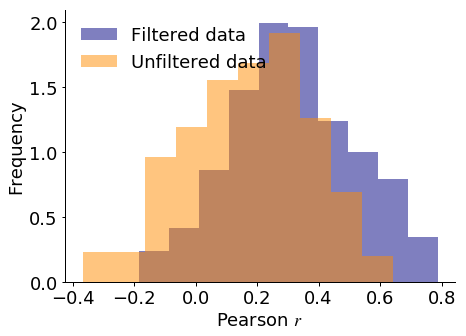

In [57]:
fig = plt.figure(figsize=(7,5))

ax  = plt.subplot(1,1,1)

plt.hist(sf_filt[0], alpha=0.5, color='navy', density=True, label='Filtered data')
plt.hist(sf_unfilt[0], alpha=0.5, color='darkorange', density=True, label='Unfiltered data')
ax.xaxis.set_tick_params(labelsize=18, width=1)
ax.yaxis.set_tick_params(labelsize=18, width=1)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.xlabel('Pearson $r$', fontsize=18)
plt.ylabel('Frequency', fontsize=18)

ax.legend(fontsize=18,frameon=False)
plt.show()

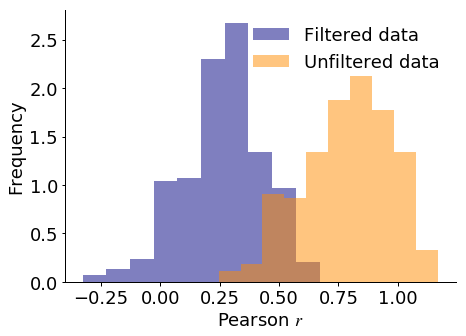

In [58]:
fig = plt.figure(figsize=(7,5))

ax  = plt.subplot(1,1,1)

plt.hist(np.log10(sf_filt[1]), alpha=0.5, color='navy', density=True, label='Filtered data')
plt.hist(np.log10(sf_unfilt[1]), alpha=0.5, color='darkorange', density=True, label='Unfiltered data')
ax.xaxis.set_tick_params(labelsize=18, width=1)
ax.yaxis.set_tick_params(labelsize=18, width=1)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.xlabel('Pearson $r$', fontsize=18)
plt.ylabel('Frequency', fontsize=18)

ax.legend(fontsize=18,frameon=False)
plt.show()


In [68]:
sf_pd = pd.DataFrame()
sf_pd['rbp'] = list(sf_filt[2].keys())
sf_pd['score'] = [sf_filt[2][x] for x in sf_filt[2].keys()]

sf_pd = sf_pd.sort_values('score')

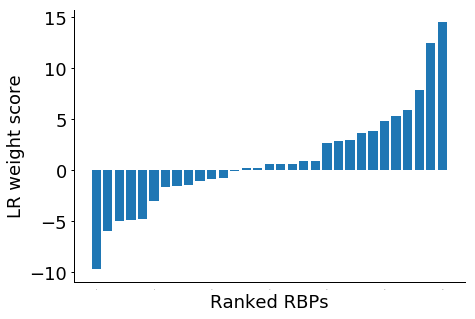

In [79]:
fig = plt.figure(figsize=(7,5))

ax  = plt.subplot(1,1,1)
ax.bar(range(len(sf_pd.score)), sorted(list(sf_pd.score)))

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.ylabel('LR weight score', fontsize=18)
ax.yaxis.set_tick_params(labelsize=18, width=1)
ax.xaxis.set_tick_params(labelsize=0, width=0)
plt.xlabel('Ranked RBPs', fontsize=18)
plt.show()

In [70]:
sf_pd.sort_values('score')

,rbp,score
7,Hnrnph3,-9.719130
9,Hnrnpl,-5.960892
21,Srsf1,-4.985605
6,Hnrnph2,-4.866755
2,Hnrnpc,-4.807172
16,Rbm39,-3.027628
25,Srsf3,-1.696914
14,Rbm17,-1.515914
27,Srsf5,-1.490694
15,Rbm3,-1.088022


In [30]:
# sf_list_ = [x for x in sf_list if x in chen_mrna_counts.loc[chen_mrna_counts.median(axis=1) >= 10].index]

# sf_mini = [x for x in sf_list if (('Srsf' in x) or ('Rbfox' in x) or ('Ptbp' in x) or ('Nova' in x) or ('Hnrnp' in x) or ('Rbm' in x) or ('Srrm' in x))] + ['Mbnl2', 'Mbnl1', 'Mbnl3']

# sf_lista = [x for x in sf_mini if x in sf_list_]
# sf_cor, sf_mse, nsf_cor, nsf_mse = test_regression(chen_PSI_filtered, chen_rsem_tab, 'Tecr_4', sf_lista, samples = 150)
# plt.hist(sf_cor, alpha=0.5)
# plt.hist(nsf_cor, alpha=0.5)
# plt.show()

In [31]:
def test_regression(psi_tab, mrna_tab, event, sf_list, sf_list_exclude, samples = 100):
    
    sr10_psi = psi_tab.loc[event, chen_pseudo_sort].dropna().copy()

    for x in sr10_psi.index[sr10_psi >= 0.999]:
        sr10_psi.loc[x] = 0.999


    for x in sr10_psi.index[sr10_psi <= 0.001]:
        sr10_psi.loc[x] = 0.001

    sr10_sigmoid = -np.log(1/sr10_psi -1)
    
    test_size = int(len(sr10_sigmoid)/5)

    
    ##############
    
    chen_mrna_counts_sf = mrna_tab.loc[sf_list]
    chen_mrna_counts_sf = chen_mrna_counts_sf.loc[chen_mrna_counts_sf.mean(axis=1) >= 1, sr10_sigmoid.index]
    
    sf_cor = []
    sf_mse = []
    nsf_cor = []
    nsf_mse = []
    
    not_sf_list = [x for x in mrna_tab.index if x not in sf_list_exclude]
    
    counts = 0
    
    for s in range(samples):

        test_set = list(chen_mrna_counts_sf.T.sample(test_size).index)
        train_set = [x for x in chen_mrna_counts_sf.columns if x not in test_set]

        LR = LinearRegression()
        LR.fit(chen_mrna_counts_sf.T.loc[train_set], sr10_sigmoid.loc[train_set])
        sf_cor.append(pearsonr(sr10_sigmoid.loc[test_set], LR.predict(chen_mrna_counts_sf.T.loc[test_set]))[0])
        sf_mse.append(mean_squared_error(sr10_sigmoid.loc[test_set], LR.predict(chen_mrna_counts_sf.T.loc[test_set])))
        
        chen_mrna_counts_nsf = mrna_tab.loc[not_sf_list]
        chen_mrna_counts_nsf = chen_mrna_counts_nsf.loc[chen_mrna_counts_nsf.mean(axis=1) >= 1, sr10_sigmoid.index]

        random_genes = chen_mrna_counts_nsf.sample(len(sf_list))

        LR = LinearRegression()
        LR.fit(random_genes.T.loc[train_set], sr10_sigmoid.loc[train_set])
        nsf_cor.append(pearsonr(sr10_sigmoid.loc[test_set], LR.predict(random_genes.T.loc[test_set]))[0])
        nsf_mse.append(mean_squared_error(sr10_sigmoid.loc[test_set], LR.predict(random_genes.T.loc[test_set])))
        
    
        counts += 1
        
        if counts % 10 == 0:
            print(counts)
            
            print(chen_mrna_counts_sf.T.loc[train_set].shape)
            print(random_genes.T.loc[train_set].shape)
            

            
    return sf_cor, sf_mse, nsf_cor, nsf_mse

10
(236, 31)
(236, 31)
20
(236, 31)
(236, 31)
30
(236, 31)
(236, 31)
40
(236, 31)
(236, 31)
50
(236, 31)
(236, 31)
60
(236, 31)
(236, 31)
70
(236, 31)
(236, 31)
80
(236, 31)
(236, 31)
90
(236, 31)
(236, 31)
100
(236, 31)
(236, 31)
110
(236, 31)
(236, 31)
120
(236, 31)
(236, 31)
130
(236, 31)
(236, 31)
140
(236, 31)
(236, 31)
150
(236, 31)
(236, 31)


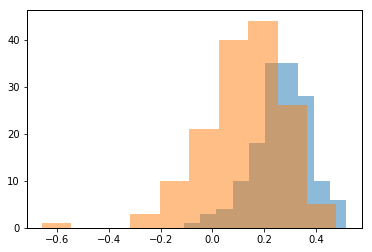

In [32]:
sf_list_ = [x for x in sf_list if x in chen_mrna_counts.loc[chen_mrna_counts.median(axis=1) >= 10].index]

sf_mini = [x for x in sf_list if (('Srsf' in x) or ('Rbfox' in x) or ('Ptbp' in x) or ('Nova' in x) or ('Hnrnp' in x) or ('Rbm' in x) or ('Srrm' in x))] + ['Mbnl2', 'Mbnl1', 'Mbnl3']

sf_lista = [x for x in sf_mini if x in sf_list_]
sf_cor, sf_mse, nsf_cor, nsf_mse = test_regression(chen_PSI_filtered, chen_rsem_tab, 'Srsf10_nmdSE_1', sf_lista, sf_mini, samples = 150)
plt.hist(sf_cor, alpha=0.5)
plt.hist(nsf_cor, alpha=0.5)
plt.show()

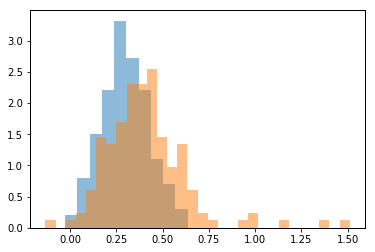

In [33]:
plt.hist(np.log10(sf_mse), alpha=0.5, density=True)
plt.hist(np.log10(nsf_mse), alpha=0.5, bins=30, density=True)
plt.show()

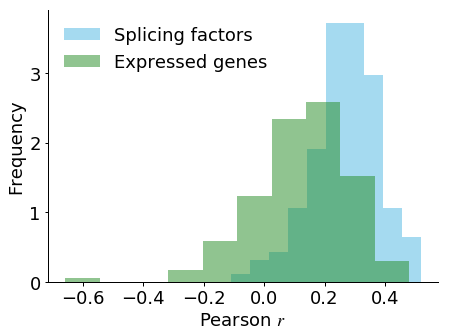

In [50]:
fig = plt.figure(figsize=(7,5))

ax  = plt.subplot(1,1,1)
ax.hist(sf_cor, alpha=0.75, color='skyblue', density=True, label='Splicing factors')
ax.hist(nsf_cor, alpha=0.5, color='forestgreen', density=True, label='Expressed genes')
ax.xaxis.set_tick_params(labelsize=18, width=1)
ax.yaxis.set_tick_params(labelsize=18, width=1)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.xlabel('Pearson $r$', fontsize=18)
plt.ylabel('Frequency', fontsize=18)

ax.legend(fontsize=18,frameon=False)
plt.show()

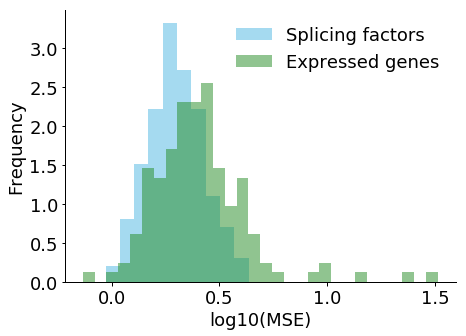

In [52]:
fig = plt.figure(figsize=(7,5))

ax  = plt.subplot(1,1,1)

plt.hist(np.log10(sf_mse), alpha=0.75, color='skyblue', density=True, label='Splicing factors')
plt.hist(np.log10(nsf_mse), alpha=0.5, bins=30, color='forestgreen', density=True, label='Expressed genes')
ax.xaxis.set_tick_params(labelsize=18, width=1)
ax.yaxis.set_tick_params(labelsize=18, width=1)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.xlabel('log10(MSE)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)

ax.legend(fontsize=18,frameon=False)
plt.show()

In [25]:
def bootstrap_regression(psi_tab, mrna_tab, event, sf_list, subsample, samples = 100):
    
    sr10_psi = psi_tab.loc[event, chen_pseudo_sort].dropna().copy()

    for x in sr10_psi.index[sr10_psi >= 0.999]:
        sr10_psi.loc[x] = 0.999


    for x in sr10_psi.index[sr10_psi <= 0.001]:
        sr10_psi.loc[x] = 0.001

    sr10_sigmoid = -np.log(1/sr10_psi -1)
    
    #test_size = int(len(sr10_sigmoid)/5)
    test_size = int(subsample/4)

    
    ##############
    
    chen_mrna_counts_sf = mrna_tab.loc[sf_list]
    #print(chen_mrna_counts_sf.index)
    chen_mrna_counts_sf = chen_mrna_counts_sf.loc[chen_mrna_counts_sf.mean(axis=1) >= 0, sr10_sigmoid.index]
    
    sf_cor = []
    sf_mse = []
    nsf_cor = []
    nsf_mse = []
        
    counts = 0
    
    sf_weight = {}
    
    for sf in sf_list:
        sf_weight.update({sf:0})
        
    
    for s in range(samples):

        test_set = list(chen_mrna_counts_sf.T.sample(test_size).index)
        train_set = [x for x in chen_mrna_counts_sf.columns if x not in test_set]
        
        train_set = chen_mrna_counts_sf.T.loc[train_set].sample(subsample).index

        
#         print(chen_mrna_counts_sf.T.loc[train_set].columns)
        LR = LinearRegression()
        LR.fit(chen_mrna_counts_sf.T.loc[train_set], sr10_sigmoid.loc[train_set])
        sf_cor.append(pearsonr(sr10_sigmoid.loc[test_set], LR.predict(chen_mrna_counts_sf.T.loc[test_set]))[0])
        sf_mse.append(mean_squared_error(sr10_sigmoid.loc[test_set], LR.predict(chen_mrna_counts_sf.T.loc[test_set])))
        
        
        for i in range(len(sf_list)):
#             print(sf_list)
#             print(len(LR.coef_))
#             print(len(sf_list))
            sf_weight[sf_list[i]] += LR.coef_[i]#/samples
        
        counts += 1
        
#         if counts % 100 == 0:
#             print(counts)
            
#             print(chen_mrna_counts_sf.T.loc[train_set].shape)
            

            
    return sf_cor, sf_mse, sf_weight

In [396]:
llaves = sf_filt[2].keys()
valores = [sf_filt[2][llave] for llave in llaves]

pd_weights = pd.DataFrame()
pd_weights['rbps'] = llaves
pd_weights['weight'] = valores
pd_weights = pd_weights.sort_values('weight')
pd_weights.index = range(len(pd_weights))

pd_weights.set_index('rbps')

,weight
rbps,
Hnrnph3,-28.852210
Srsf1,-23.170987
Hnrnpl,-18.814974
Hnrnph2,-17.891272
Hnrnpc,-16.102042
Rbm39,-9.962615
Srsf3,-6.413559
Srsf5,-5.825363
Rbm3,-3.805560


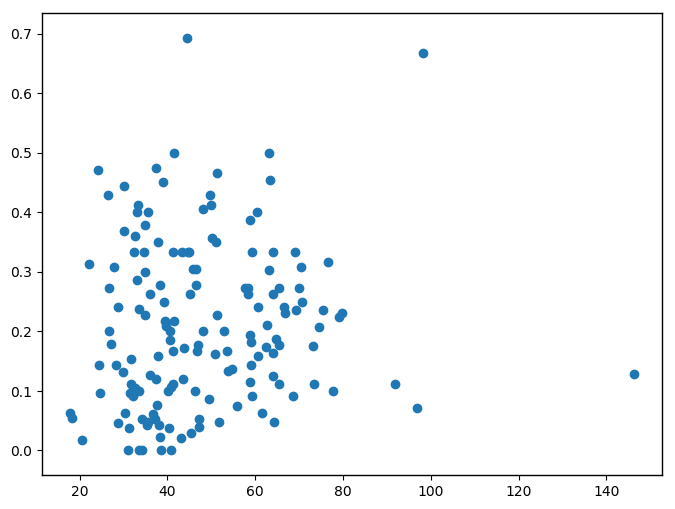

In [393]:
plt.scatter(chen_mrna_counts.loc['Ptbp1', list(ES2i)+list(ES)],
            chen_PSI_filtered.loc['Srsf10_nmdSE_1', list(ES2i)+list(ES)])
plt.show()

In [429]:
sf_list_ = [x for x in sf_list if x in chen_mrna_counts.loc[chen_mrna_counts[Epi].median(axis=1) >= 10].index]
sf_mini = [x for x in sf_list_ if (('Srsf' in x) or ('Rbfox' in x) or ('Ptbp' in x) or ('Nova' in x) or ('Hnrnp' in x) or ('Rbm' in x) or ('Srrm' in x))] + ['Mbnl2', 'Mbnl1', 'Mbnl3']
print(sf_mini)
sf_unfilt = bootstrap_regression(chen_PSI[list(Epi)], chen_mrna_counts[list(Epi)], 
                                 'Rbm39_nmdSE_2', [x for x in sf_mini if x in sf_list_], 50, samples = 1000)
sf_filt = bootstrap_regression(chen_PSI_filtered[list(Epi)], chen_mrna_counts[list(Epi)], 
                               'Rbm39_nmdSE_2', [x for x in sf_mini if x in sf_list_], 50, samples = 1000)
# plt.hist(sf_filt[0], alpha=0.5, c='navy')
# plt.hist(sf_unfilt[0], alpha=0.5, c='darkorange')
# plt.show()

['Hnrnpa1', 'Hnrnpa2b1', 'Hnrnpc', 'Hnrnpd', 'Hnrnpf', 'Hnrnph1', 'Hnrnph2', 'Hnrnph3', 'Hnrnpk', 'Hnrnpl', 'Hnrnpm', 'Hnrnpr', 'Hnrnpu', 'Ptbp1', 'Rbm17', 'Rbm3', 'Rbm39', 'Rbm5', 'Rbm8a', 'Srrm1', 'Srrm2', 'Srsf1', 'Srsf1', 'Srsf10', 'Srsf11', 'Srsf2', 'Srsf3', 'Srsf4', 'Srsf5', 'Srsf6', 'Srsf7', 'Srsf9', 'Mbnl2', 'Mbnl1', 'Mbnl3']


ValueError: a must be greater than 0

In [ ]:
plt.hist(sf_filt[0], alpha=0.5, color='navy')
plt.hist(sf_unfilt[0], alpha=0.5, color='darkorange')
plt.show()

In [ ]:
plt.hist(np.log10(sf_filt[1]), alpha=0.5, color='navy')
plt.hist(np.log10(sf_unfilt[1]), alpha=0.5, color='darkorange')
plt.show()

In [ ]:
sf_mini

In [433]:
sf_list_ = [x for x in sf_list if x in chen_mrna_counts.loc[chen_mrna_counts.median(axis=1) >= 10].index]

KeyboardInterrupt: 

In [2]:
tabula_mrna_counts = pd.read_csv('tabula.mrna_counts.tab', sep='\t', index_col=0)

In [57]:
tabula = spu.get_psi_table('tabula.SJ_counts.tab', minJR=1, minCell=1, drop_duplicates = False)


In [58]:
tabula_PSI = tabula[3]
tabula_read_counts = tabula[4]

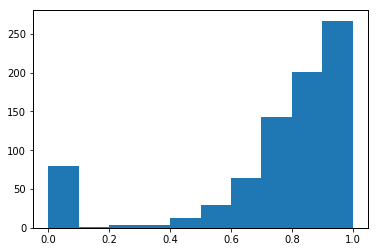

In [5]:
plt.hist(tabula[3].loc['Sept4_1'].dropna())
plt.show()

In [6]:
mrna_per_event_tabula = tabula_mrna_counts.loc[[x.split('_')[0] for x in tabula_PSI.index]]
mrna_per_event_tabula.index = tabula_PSI.index

/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [7]:
tabula_mrna_counts.shape

(25988, 2232)

In [13]:
#mrna_per_event_tabula.dropna()

In [11]:
tabula_mrna_expressed = tabula_mrna_counts.loc[tabula_mrna_counts.quantile(0.9, axis=1) >= 1]

In [12]:
tabula_mrna_expressed.loc[[x for x in tabula_mrna_expressed.index if 'Srsf' in x]]

,SRR6538303,SRR6538304,SRR6538305,SRR6538306,SRR6538307,SRR6538308,SRR6538309,SRR6538310,SRR6538311,SRR6538312,...,SRR6542110,SRR6542113,SRR6542114,SRR6542116,SRR6542117,SRR6542119,SRR6542123,SRR6542125,SRR6542126,SRR6542128
mgi_symbol,,,,,,,,,,,,,,,,,,,,,
Srsf6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.281325,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,2.640542,0.000000,0.000000
Srsf1,2.188177,0.395192,0.000000,0.000000,1.105751,0.000000,1.762574,2.368661,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.004414,0.000000,0.123693
Srsf5,0.000000,4.466842,7.356489,6.428494,1.833596,6.879402,12.887982,12.056133,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,6.624952,6.592696,0.100204
Srsf7,0.000000,3.508687,4.153761,1.566362,1.315415,1.495405,0.471612,1.265816,4.194354,4.904358,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.995477,0.000000,0.000000
Srsf10,0.000000,0.041072,0.000000,0.000000,0.619810,0.000000,3.985566,4.461982,0.788365,1.628277,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.049872,0.000000,1.631286
Srsf4,0.000000,0.000000,0.000000,0.000000,0.620237,0.000000,0.955163,0.255991,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.647802,0.000000,0.000000
Srsf9,5.911111,0.000000,0.000000,2.771775,3.120828,1.217409,15.541544,13.385202,3.521014,1.445318,...,0.0,0.0,0.0,1.310417,0.000000,0.0,0.0,0.000000,4.061335,0.000000
Srsf2,3.817736,0.050360,0.000000,6.653610,12.784996,1.753257,5.773512,6.631208,0.000000,0.000000,...,0.0,0.0,0.0,1.435479,1.482061,0.0,0.0,9.335208,2.005484,15.017744
Srsf11,4.260067,0.000000,0.000000,0.000000,0.000000,0.000000,1.079782,9.037821,1.189534,1.575752,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,3.948658,5.161832,4.901400


In [15]:
tabula_el = pd.read_csv('tabula.rsem_len.tab', sep='\t', index_col=0)


In [17]:
tabula_rsem_counts = pd.read_csv('tabula.rsem_counts.tab', sep='\t', index_col=0)


In [18]:
tabula_len = 200
tabula_c = ((tabula_rsem_counts*(tabula_mrna_counts > 0)*tabula_len).sum()/(tabula_mrna_counts*tabula_el).sum())

In [22]:
mrna_per_event_tabula = tabula_mrna_expressed.loc[[x.split('_')[0] for x in tabula_PSI.index if x.split('_')[0] in tabula_mrna_expressed.index]]
mrna_per_event_tabula.index = [x for x in tabula_PSI.index if x.split('_')[0] in tabula_mrna_expressed.index]

In [141]:
good_events = mrna_per_event_tabula.index[(((mrna_per_event_tabula >= 10) & (tabula_read_counts.loc[mrna_per_event_tabula.index] >= 10)).sum(axis=1) >= 50)]

In [151]:
good_obs = ((mrna_per_event_tabula >= 20) & (tabula_read_counts.loc[mrna_per_event_tabula.index] >= 10)).loc[good_events]

In [152]:
tabula_good_PSI = tabula_PSI.loc[good_events].mask(~good_obs)


In [23]:
tabula_int_genes, tabula_int_exons = spu.get_int_events(tabula_PSI, tabula_read_counts, 0.05)
#tabula_int_exons = [x for x in tabula_int_exons if x in tabula_read_counts.index]

In [35]:
def filter_psi(psi_tab, int_exons, mrna_tab, cj, reads_tab, mrna_min, reads_min=0, cell_min=0.5):
    
    int_exons = [x for x in int_exons if x in mrna_tab.index]
    print(len(int_exons))
    reads_tab = reads_tab.loc[int_exons, mrna_tab.columns]
    mrna_tab = mrna_tab.loc[int_exons, mrna_tab.columns]
    cj = cj.loc[mrna_tab.columns]
    psi_tab = psi_tab.loc[int_exons, mrna_tab.columns]

    cj_filter = (reads_tab.loc[int_exons, cj.index] >= (mrna_min*cj*(1+psi_tab.loc[int_exons, cj.index])))
    mrna_filter = (mrna_tab.loc[int_exons, cj.index] >= mrna_min) & (reads_tab.loc[int_exons, cj.index] >= reads_min) #&
    quality = ((mrna_filter & cj_filter).mean(axis=1) >= cell_min)
    good_exons = quality.loc[quality].index

    filter_tab = (mrna_filter & cj_filter).loc[good_exons]
    psi_tab_mrna = psi_tab.loc[good_exons]

    print(len(good_exons))

    PSI_filtered = psi_tab_mrna
    PSI_filtered = psi_tab_mrna.mask(~filter_tab)
    PSI_filtered = PSI_filtered.dropna(how='all') # might be unnecessary
    PSI_mrna_filtered = PSI_filtered.loc[PSI_filtered.isnull().mean(axis=1) < (1-cell_min)] # might be unnecessary
    total_exons = len(PSI_mrna_filtered.index)
    
    #PSI_mrna_z = get_zscore2(PSI_mrna_filtered)

    return PSI_filtered, PSI_mrna_filtered, good_exons#, PSI_mrna_z



In [88]:
tabula_filt = filter_psi(tabula_PSI, tabula_int_exons, mrna_per_event_tabula, tabula_c, tabula[4], 
                         20, reads_min=10, cell_min=0.1)

1145


/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """
/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


9


In [89]:
'Sept4_1' in tabula_filt[2]

True

Aplp2_2


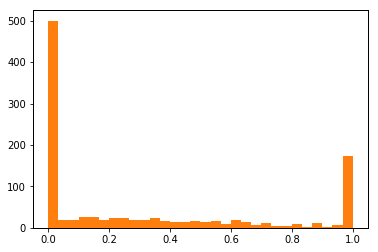

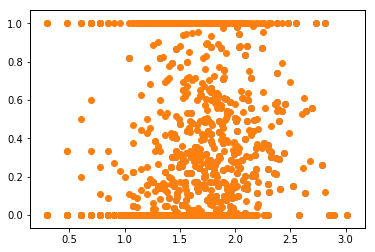

Apod_1


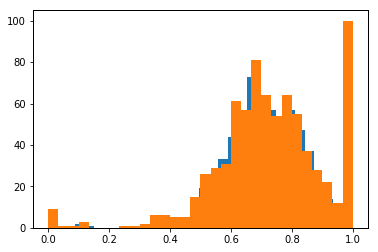

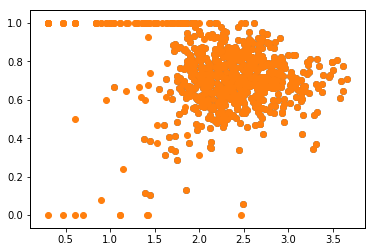

App_1


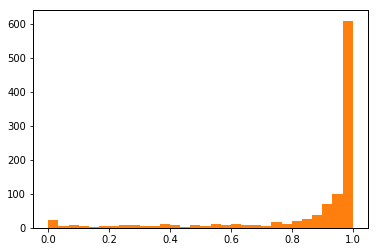

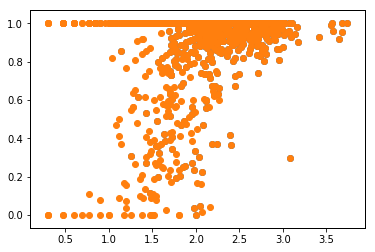

Bin1_3


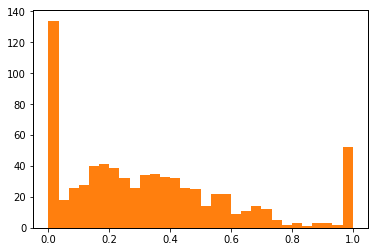

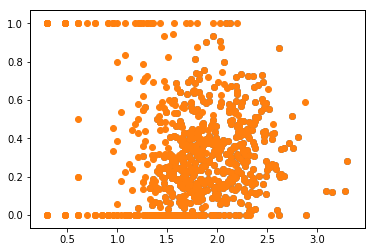

Bin1_5


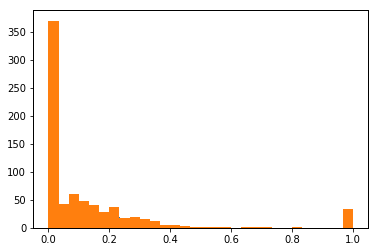

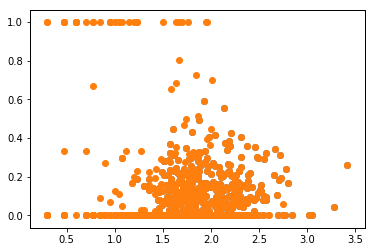

Enpp2_2


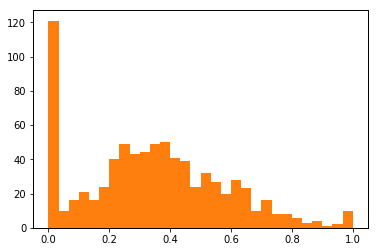

KeyboardInterrupt: 

In [86]:
for i in tabula_filt[2]:
    print(i)
    plt.figure()
    plt.hist(tabula_filt[0].loc[i].dropna(), bins=30)
    plt.hist(tabula[3].loc[i].dropna(), bins=30)
    plt.show()
    plt.figure()
    plt.scatter(np.log10(tabula[4].loc[i]+1), tabula_filt[0].loc[i, tabula[4].columns])
    plt.scatter(np.log10(tabula[4].loc[i]+1), tabula[3].loc[i, tabula[4].columns])
    plt.show()

In [83]:
tabula_filt[0].isna().sum(axis=1)

Aplp2_2    1930
Apod_1     1574
App_1      1466
Bin1_3     1755
Bin1_5     1731
Enpp2_2    1592
Mag_1      1563
Mbp_1      1532
Mbp_4      1531
Ncam1_1    1947
Psap_1     1444
Sept4_1    1543
Stmn4_3    1954
Tecr_4     1585
dtype: int64

In [85]:
tabula[3].loc[tabula_filt[0].index].isna().sum(axis=1)

Aplp2_2    101
Apod_1     410
App_1      128
Bin1_3     442
Bin1_5     437
Enpp2_2    401
Mag_1      503
Mbp_1      405
Mbp_4      412
Ncam1_1    309
Psap_1      18
Sept4_1    380
Stmn4_3    430
Tecr_4     139
dtype: int64

Apod_1


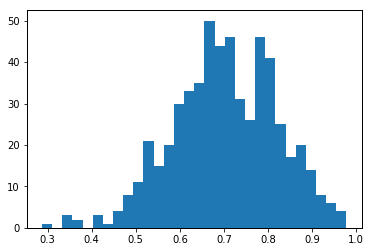

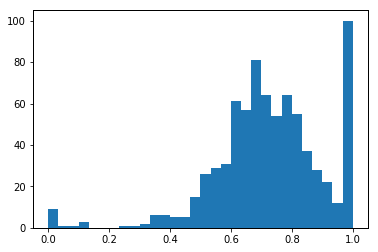

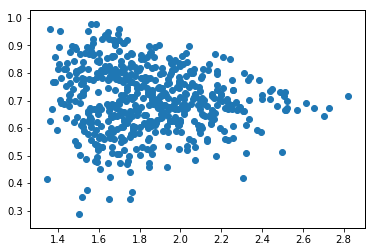

App_1


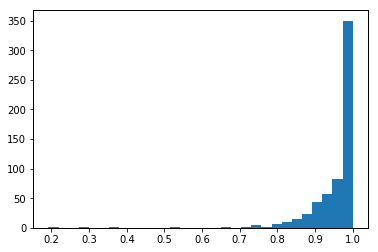

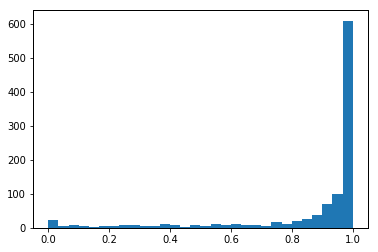

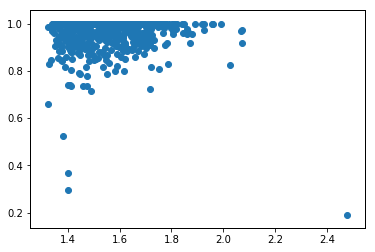

Enpp2_2


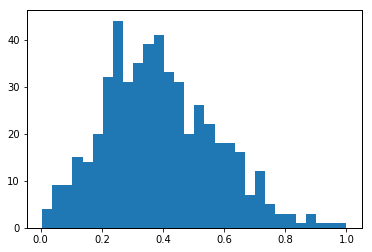

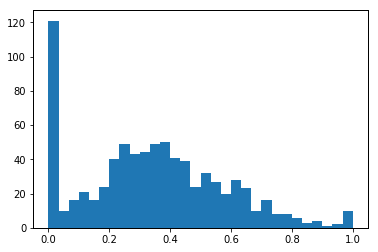

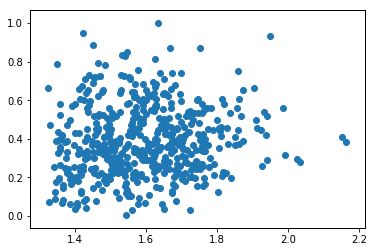

Mag_1


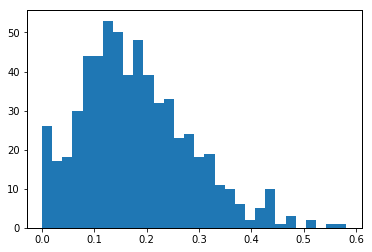

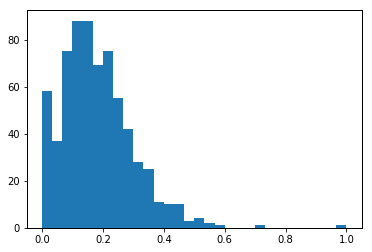

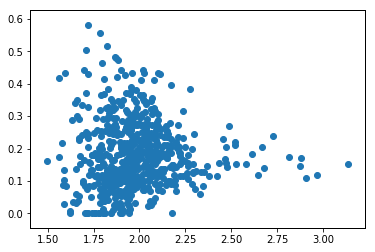

Mbp_1


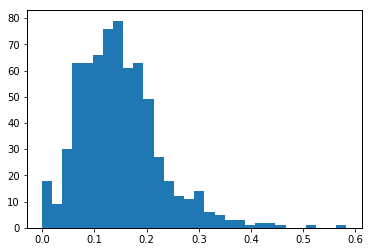

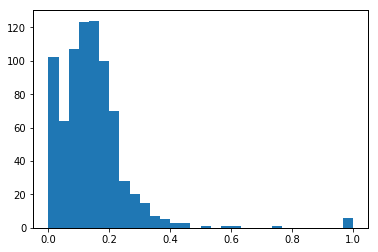

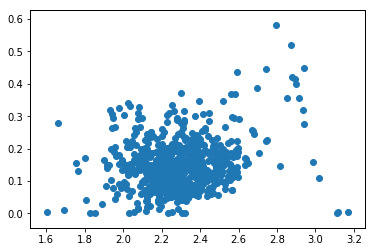

Mbp_4


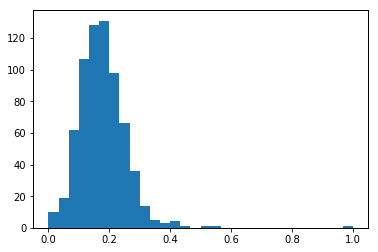

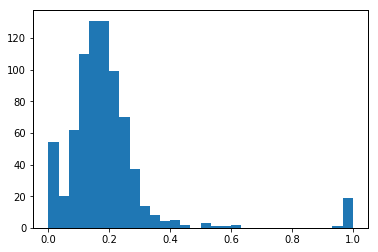

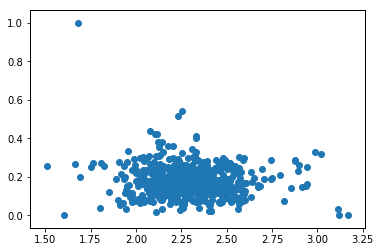

Psap_1


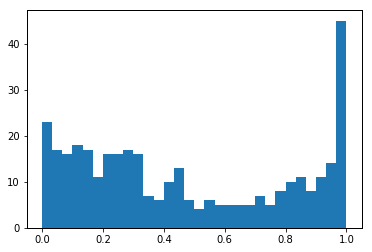

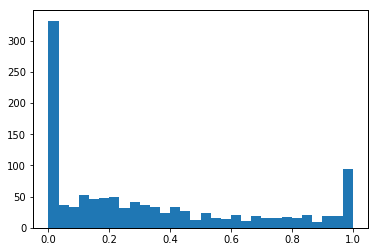

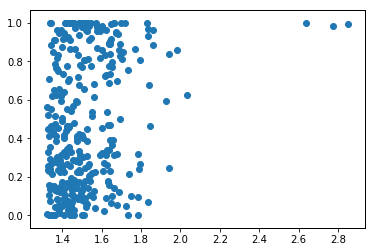

Sept4_1


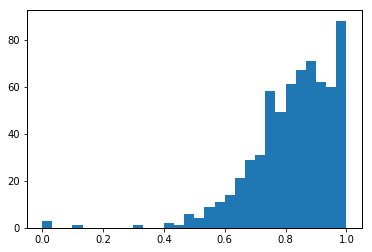

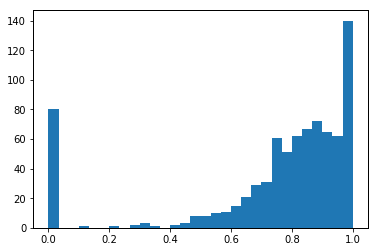

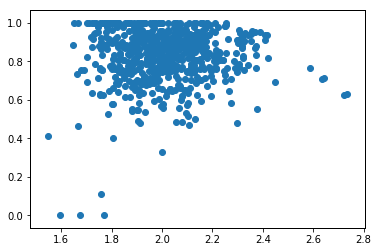

Tecr_4


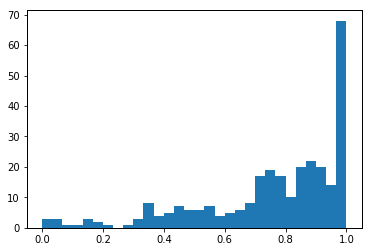

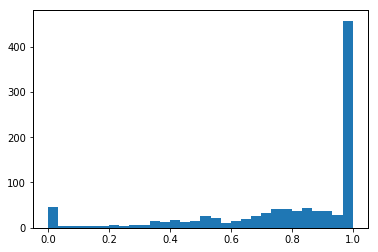

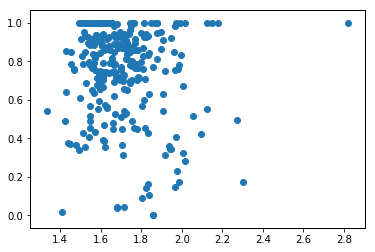

In [90]:
for i in tabula_filt[2]:
    print(i)
    plt.figure()
    plt.hist(tabula_filt[0].loc[i].dropna(), bins=30)
    plt.show()
    plt.figure()
    plt.hist(tabula[3].loc[i].dropna(), bins=30)
    plt.show()
    plt.figure()
    plt.scatter(np.log10(mrna_per_event_tabula.loc[i]+1), tabula_filt[0].loc[i])
    plt.show()
   

Apod_1


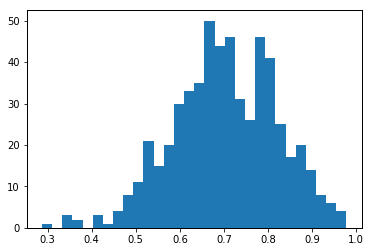

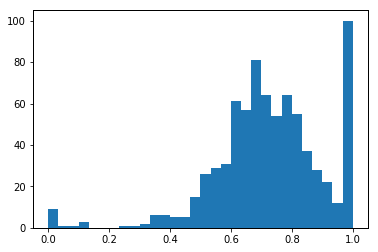

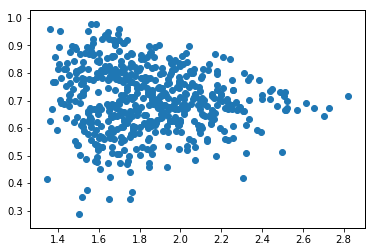

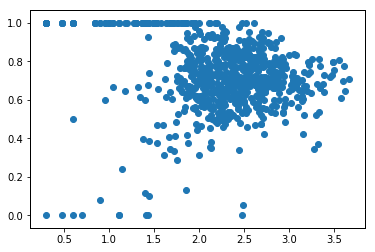

App_1


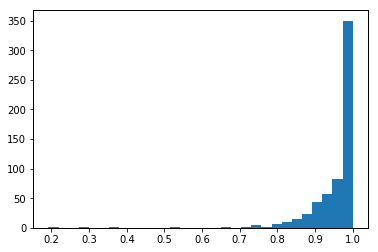

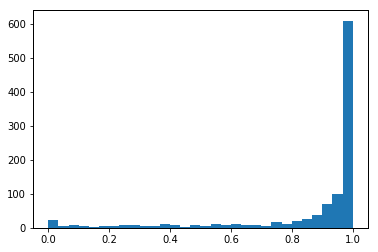

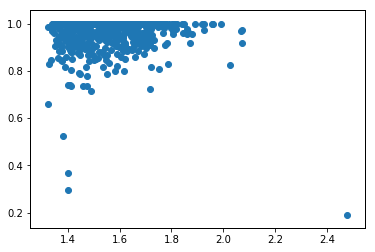

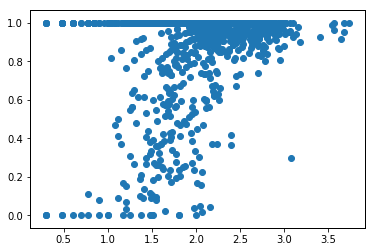

Enpp2_2


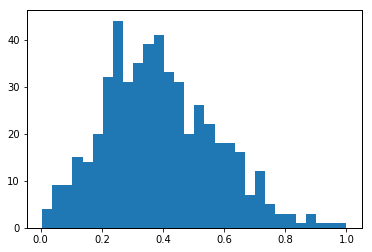

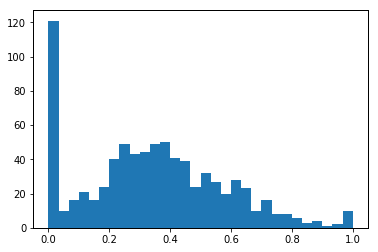

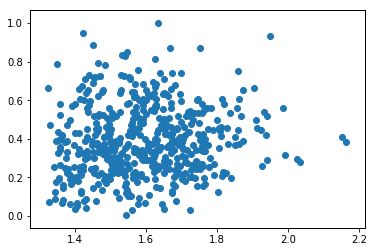

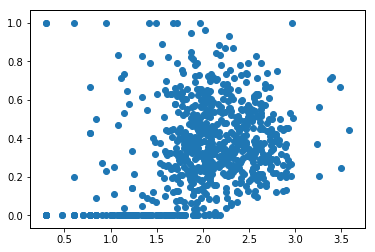

Mag_1


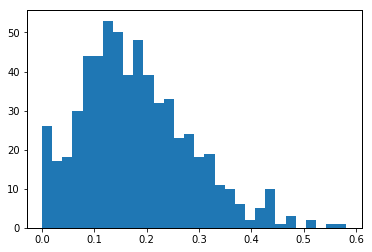

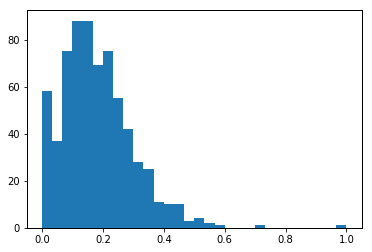

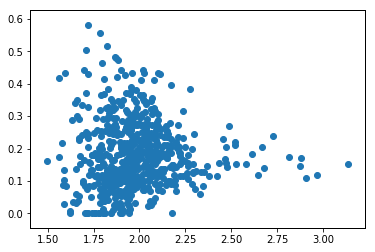

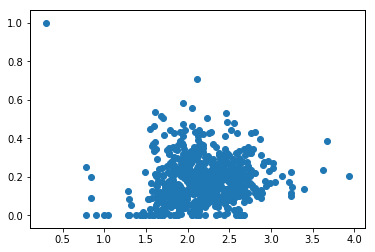

Mbp_1


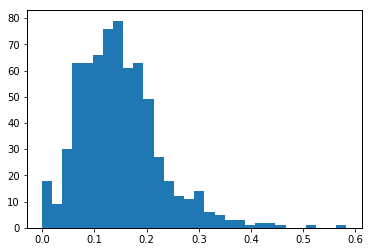

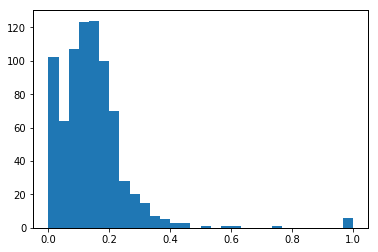

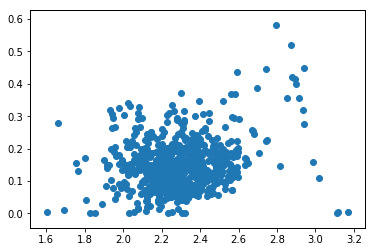

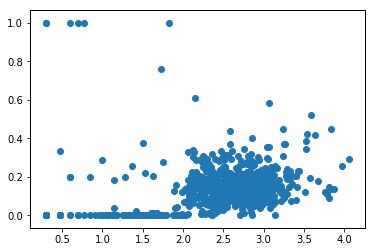

Mbp_4


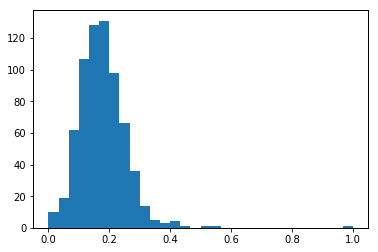

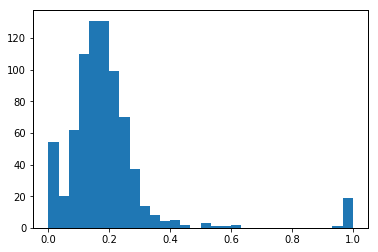

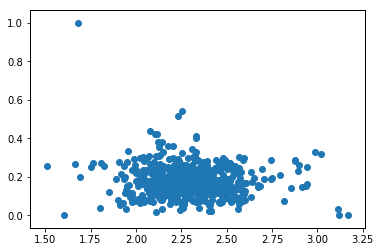

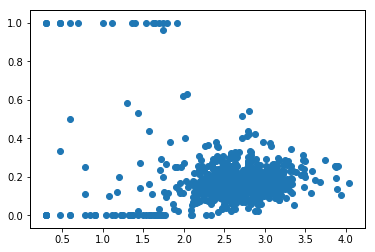

Psap_1


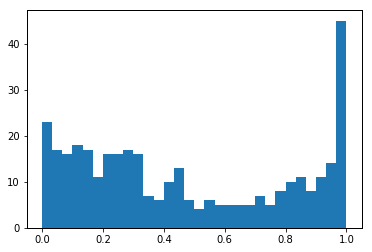

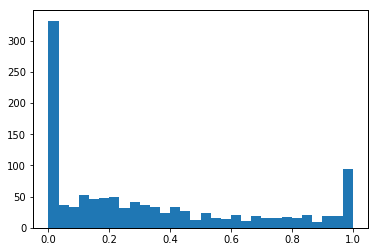

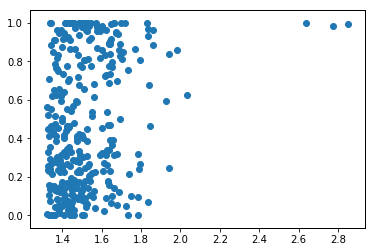

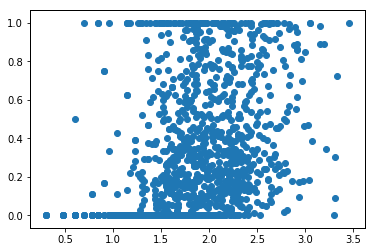

Sept4_1


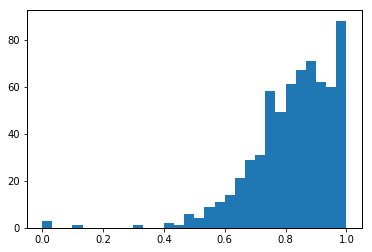

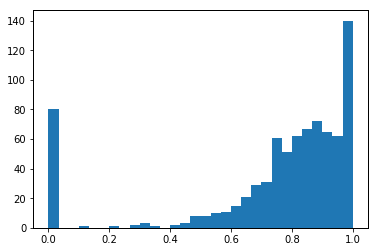

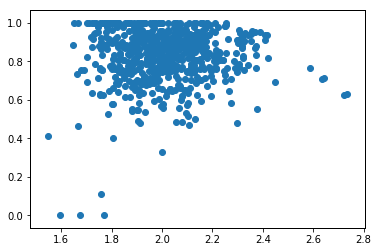

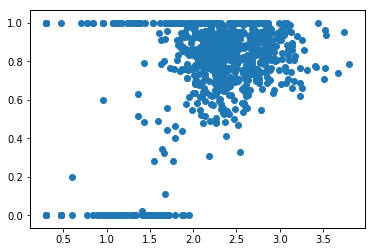

Tecr_4


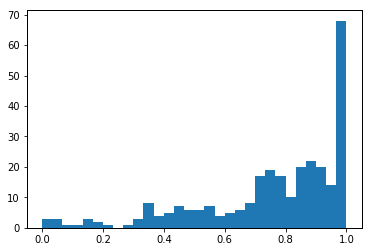

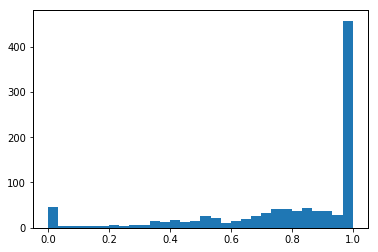

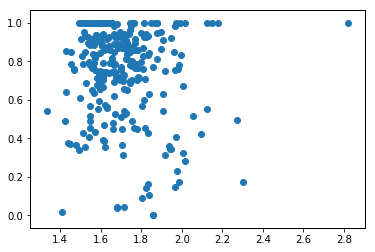

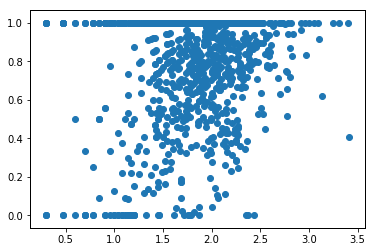

In [91]:
for i in tabula_filt[2]:
    print(i)
    plt.figure()
    plt.hist(tabula_filt[0].loc[i].dropna(), bins=30)
    plt.show()
    plt.figure()
    plt.hist(tabula[3].loc[i].dropna(), bins=30)
    plt.show()
    plt.figure()
    plt.scatter(np.log10(mrna_per_event_tabula.loc[i]+1), tabula_filt[0].loc[i])
    plt.show()
    
    plt.figure()
    plt.scatter(np.log10(tabula[4].loc[i]+1), tabula[3].loc[i])
    plt.show()
   

In [78]:
tabula_int_exons = tabula_PSI.index[np.abs((0.5 - tabula_PSI.mean(axis=1))) <= 0.40]

In [155]:
tabula_final_filter = [x for x in tabula_int_exons if x in tabula_good_PSI.index]

In [ ]:
#tabula_good_PSI.loc[tabula_final_filter]

Aplp2_2


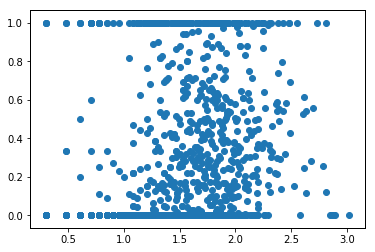

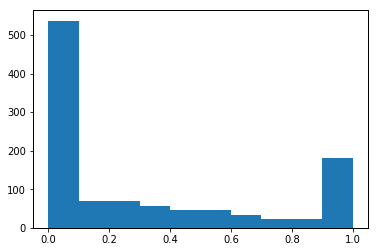

Apod_1


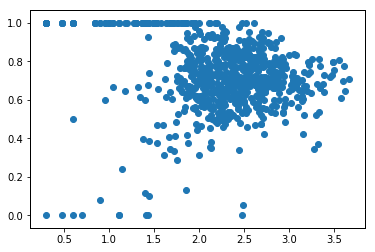

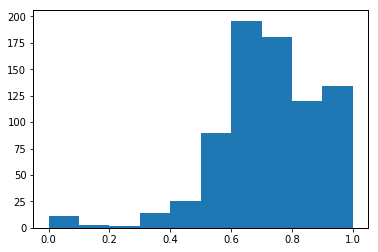

App_1


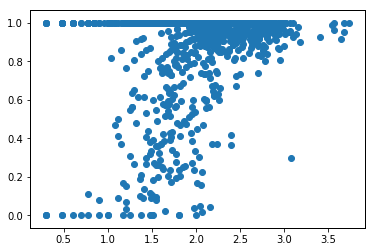

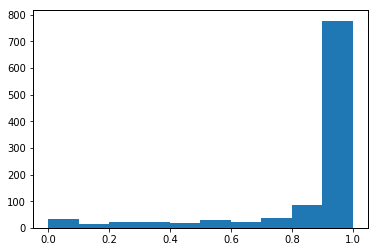

Aspa_2


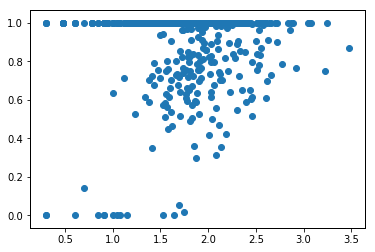

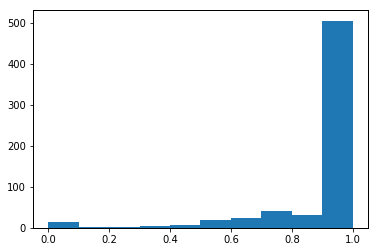

Atp5j_1


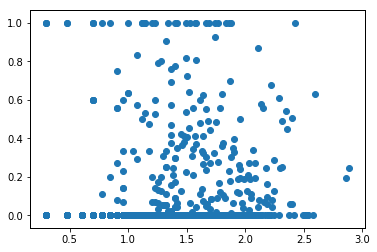

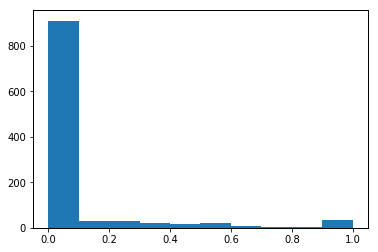

Bin1_3


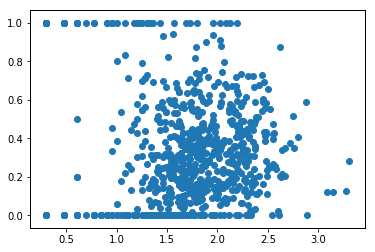

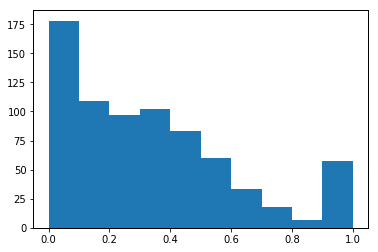

Bin1_4


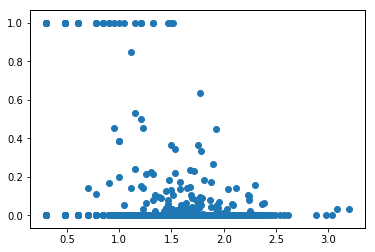

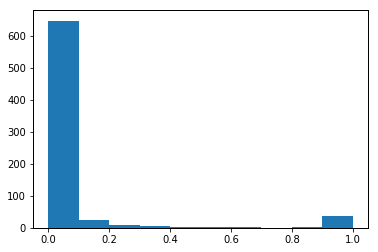

Bin1_5


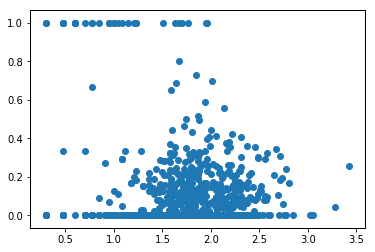

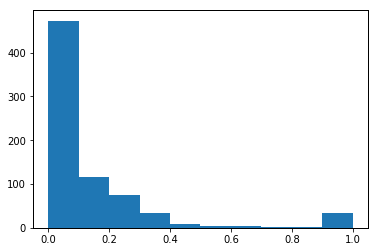

Dbndd2_1


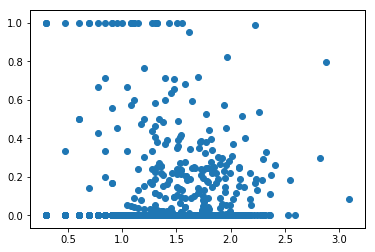

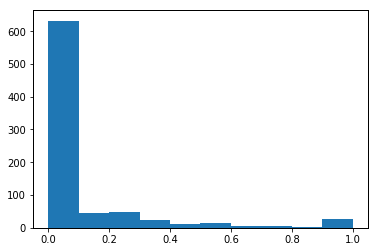

Enpp2_2


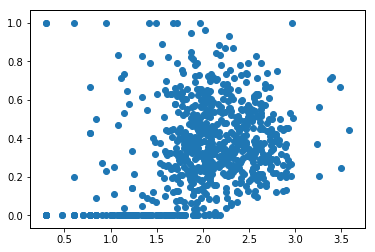

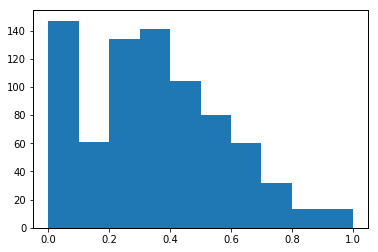

Gpm6b_1


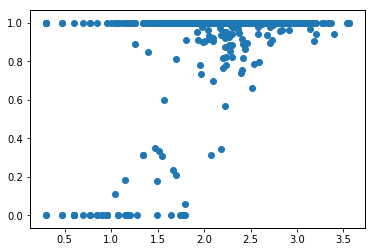

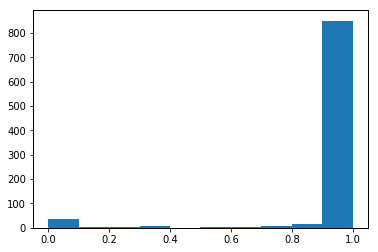

Hnrnpk_5


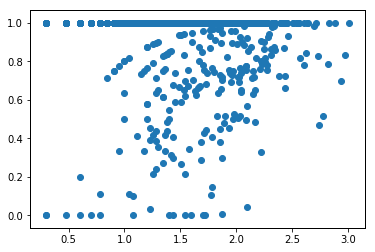

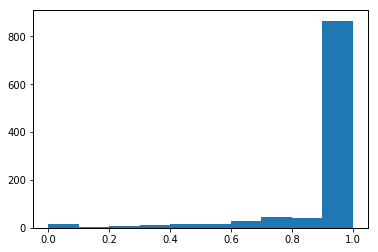

Josd2_nmdSE_1


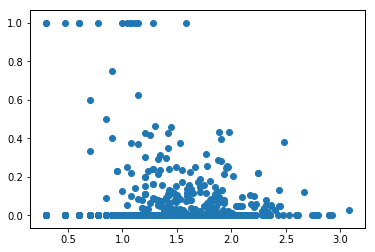

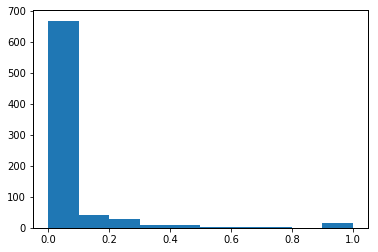

Mag_1


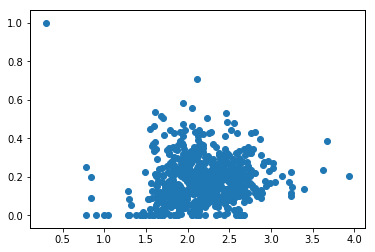

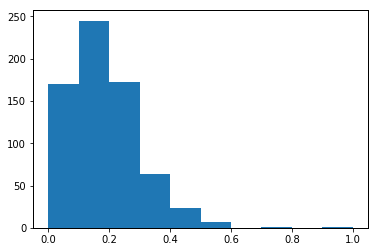

Mapt_3


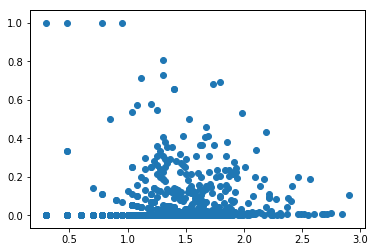

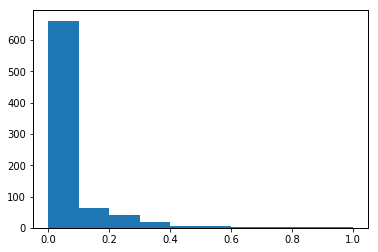

Mapt_4


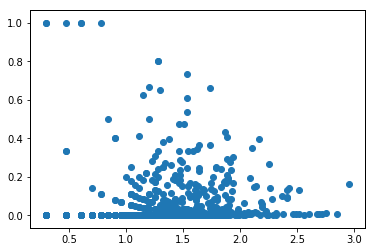

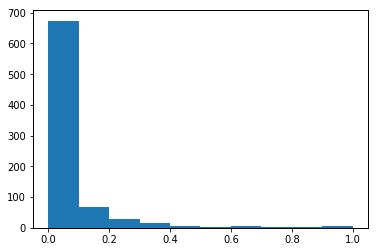

Mbp_1


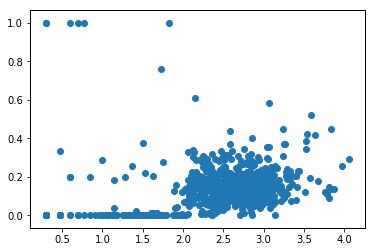

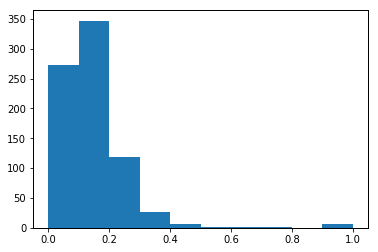

Mbp_4


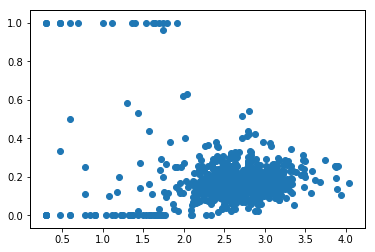

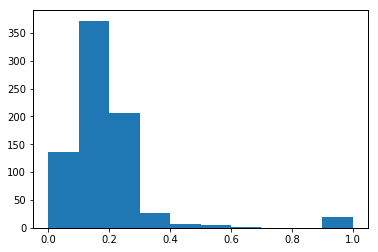

Ncam1_1


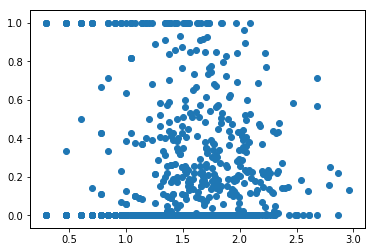

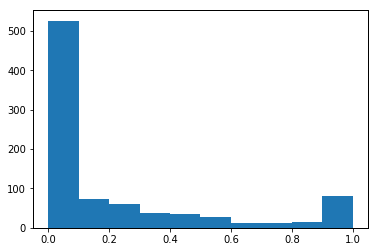

Psap_1


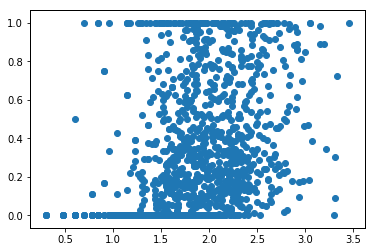

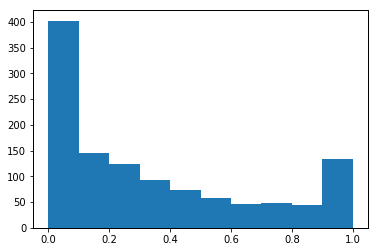

Sept4_1


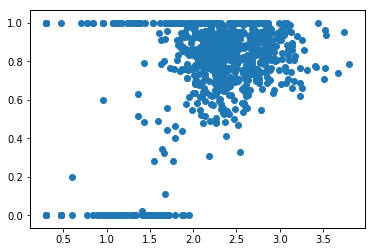

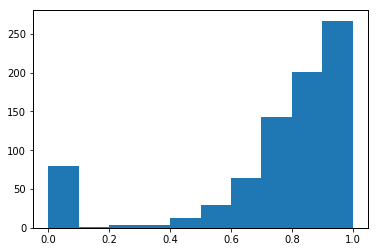

Stmn4_3


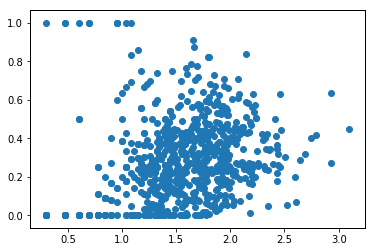

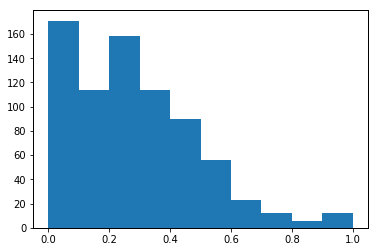

Tecr_4


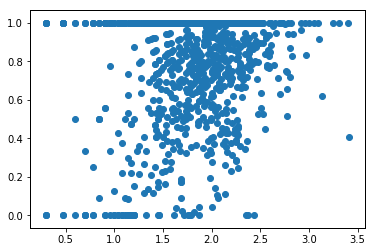

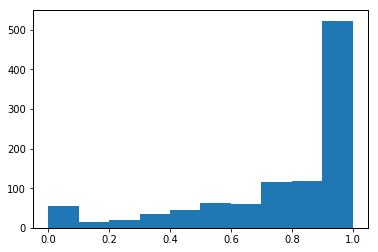

In [64]:
for event in tabula_filt[2]:
    print(event)
    plt.scatter(np.log10(tabula_read_counts.loc[event]+1), tabula_PSI.loc[event])
    plt.show()
    plt.hist(tabula_PSI.loc[event].dropna())
    plt.show()

(array([  6.,   5.,   2.,   9.,  14.,  27.,  66., 129., 246., 355.]),
 array([0.97457627, 0.97711864, 0.97966102, 0.98220339, 0.98474576,
        0.98728814, 0.98983051, 0.99237288, 0.99491525, 0.99745763,
        1.        ]),
 <a list of 10 Patch objects>)

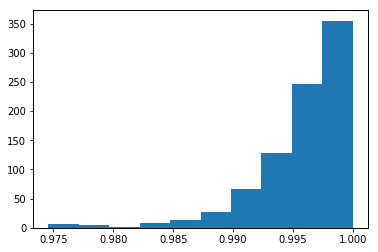

In [106]:
plt.hist(tabula_good_PSI.loc['Actb_2'].dropna())

In [102]:
tabula_PSI.loc[tabula_good_PSI.head().index]

,SRR6538303,SRR6538304,SRR6538305,SRR6538306,SRR6538307,SRR6538308,SRR6538309,SRR6538310,SRR6538313,SRR6538314,...,SRR6542013,SRR6542018,SRR6542039,SRR6542051,SRR6542056,SRR6542089,SRR6542090,SRR6542125,SRR6542126,SRR6542128
Acot7_1,1.000000,NaN,NaN,1.000000,NaN,1.000000,1.000000,1.000000,1.0,1.000000,...,0.517241,1.0,1.000000,1.000000,0.934783,1.000000,1.000000,1.00,1.0,1.000000
Actb_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000
Actb_2,0.996473,1.000000,0.994723,1.000000,0.996947,0.995833,0.993399,0.996485,1.0,0.996947,...,0.991667,1.0,1.000000,0.989218,1.000000,0.994595,1.000000,1.00,1.0,1.000000
Actg1_nmdSE_1,0.050847,0.014315,0.025105,0.015873,0.010081,0.033333,0.018634,0.000000,0.0,0.000000,...,0.000000,0.0,0.023941,0.017544,0.000000,0.044444,0.056604,0.04,0.0,0.000000
Add1_4,0.200000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.636364


In [107]:
tabula_int_genes, tabula_int_exons = spu.get_int_events(tabula_PSI, tabula_read_counts, 0.05)
tabula_int_exons = [x for x in tabula_int_exons if x in tabula_read_counts.index]

In [43]:
int_exons = tabula_PSI.loc[np.abs(0.5 - tabula_PSI.mean(axis=1)) <= 0.20].index

In [51]:
tabula_read_counts.loc[int_exons].quantile(0.75, axis=1).sort_values()

0610010K14Rik_3      0.00
Plekha5_8            0.00
Plekhm2_1            0.00
Plod2_1              0.00
Plpp5_2              0.00
Pml_3                0.00
Pms1_1               0.00
Pms1_2               0.00
Pnpla6_2             0.00
Porcn_10             0.00
Ppfia3_1             0.00
Ppip5k2_5            0.00
Ppip5k2_6            0.00
Ppp1r12a_1           0.00
Plcb1_2              0.00
Ppp1r9a_nmdSE_1      0.00
Ppp3ca_1             0.00
Ppp4r1l-ps_6         0.00
Pqlc1_1              0.00
Prdm16_1             0.00
Prkd1_1              0.00
Prkrir_nmdSE_1       0.00
Prpsap2_6            0.00
Prr13_1              0.00
Prr14l_2             0.00
Prrc2b_1             0.00
Prrc2c_7             0.00
Prss36_1             0.00
Prss36_3             0.00
Ppp2r5c_1            0.00
                    ...  
Tra2b_nmdSE_1        2.00
Pex5l_3              2.00
Pex5l_1              3.00
Tmem14c_2            3.00
Comt_1               4.00
Mff_3                4.00
Ndrg2_1              4.00
Mbnl2_2     

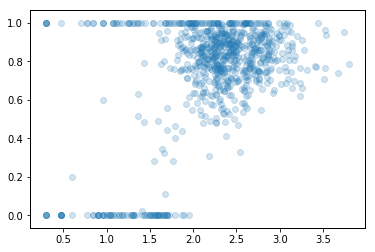

In [59]:
plt.scatter(np.log10(tabula[4].loc['Sept4_1']+1), tabula[3].loc['Sept4_1'], alpha=0.2)
plt.show()

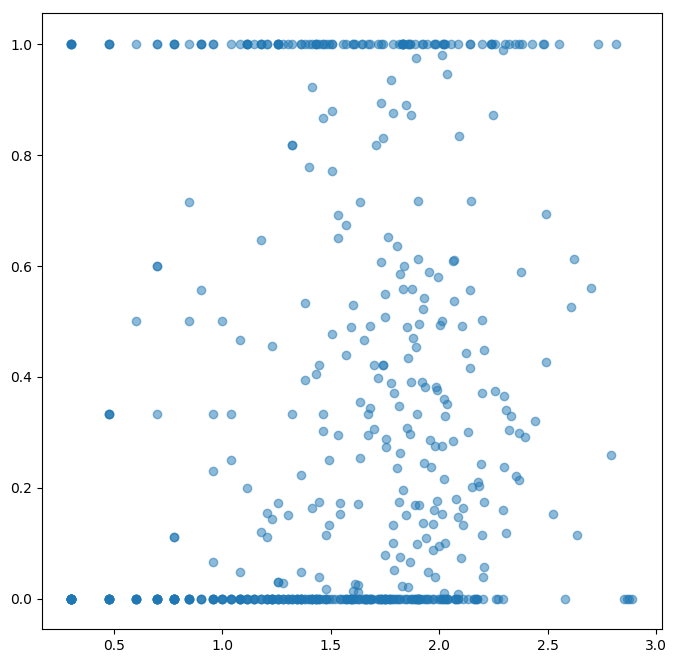

In [88]:
plt.scatter(np.log10(tabula[4].loc['Aplp2_2']+1), tabula[3].loc['Aplp2_2'], alpha=0.5)
plt.show()

In [56]:
tabula_mrna_counts.sum(axis=0).sort_values()

SRR6541010       137.680019
SRR6541864       145.938222
SRR6542025       181.901218
SRR6542065       183.389382
SRR6541760       229.107395
SRR6539982       235.074098
SRR6541577       318.762502
SRR6539962       323.036112
SRR6541777       326.541527
SRR6539960       332.695808
SRR6541105       335.389140
SRR6541246       351.279900
SRR6540209       354.340711
SRR6542117       358.174880
SRR6541578       360.845500
SRR6541779       376.555993
SRR6541990       391.672960
SRR6540211       395.727201
SRR6541736       429.497188
SRR6541137       433.062081
SRR6541767       434.381684
SRR6541756       441.703429
SRR6539993       445.031783
SRR6541634       445.647658
SRR6541692       451.545989
SRR6541195       454.831475
SRR6540176       459.721170
SRR6540045       468.823340
SRR6541135       471.122698
SRR6542119       473.141061
                  ...      
SRR6542074    289181.740495
SRR6539952    292265.445740
SRR6541630    294197.315062
SRR6540859    295687.879097
SRR6541774    304977

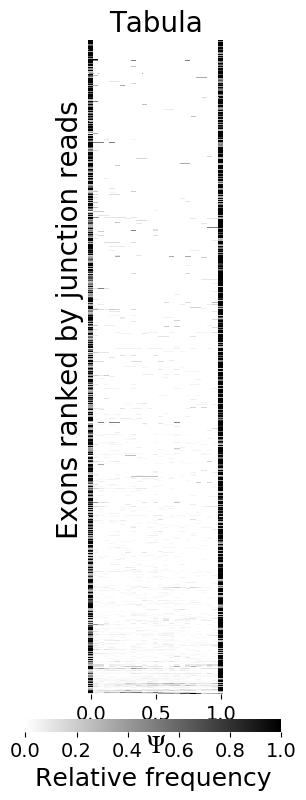

In [72]:
tabula_hist_complete, tabula_hist_intermediate = scp.get_bins_table(tabula[3][tabula[4].columns[tabula[4].sum() >= tabula[4].sum().quantile(0.75)]], 
                                                                    tabula[4][tabula[4].columns[tabula[4].sum() >= tabula[4].sum().quantile(0.75)]])


import importlib
importlib.reload(scp)
importlib.reload(spu)
sns.reset_orig()
mpl.rcParams["mathtext.fontset"] = "stix"

hist_list = [tabula_hist_intermediate]

dset_name_list = ['Tabula']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots/figure1/', plot_name = 'PSI_distributions_tabula',
                    plot_title = "", 
                    ylab='Exons ranked by junction reads', ls=18, sk=1.65, tfs=20)

plt.show()

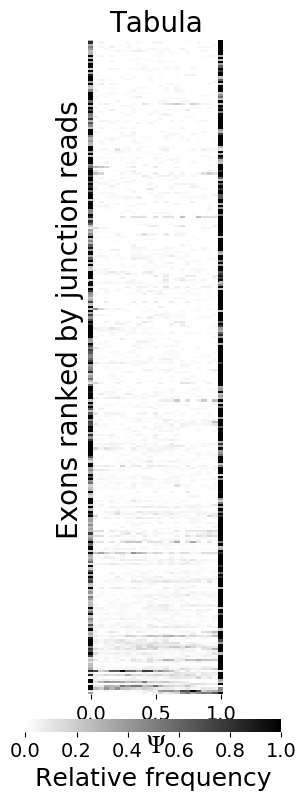

In [73]:
hist_list_300 = [x.loc[x.index[-300:]] for x in hist_list]

scp.plot_histograms(hist_list_300, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots/figure1/', plot_name = 'PSI_distributions_tabula',
                    plot_title = "", 
                    ylab='Exons ranked by junction reads', ls=18, sk=1.65, tfs=20)

plt.show()

In [69]:
tabula[4].columns[tabula[4].sum() >= tabula[4].sum().quantile()]

Index(['SRR6538303', 'SRR6538304', 'SRR6538305', 'SRR6538306', 'SRR6538307',
       'SRR6538308', 'SRR6538309', 'SRR6538310', 'SRR6538313', 'SRR6538314',
       ...
       'SRR6542013', 'SRR6542018', 'SRR6542039', 'SRR6542051', 'SRR6542056',
       'SRR6542089', 'SRR6542090', 'SRR6542125', 'SRR6542126', 'SRR6542128'],
      dtype='object', length=571)

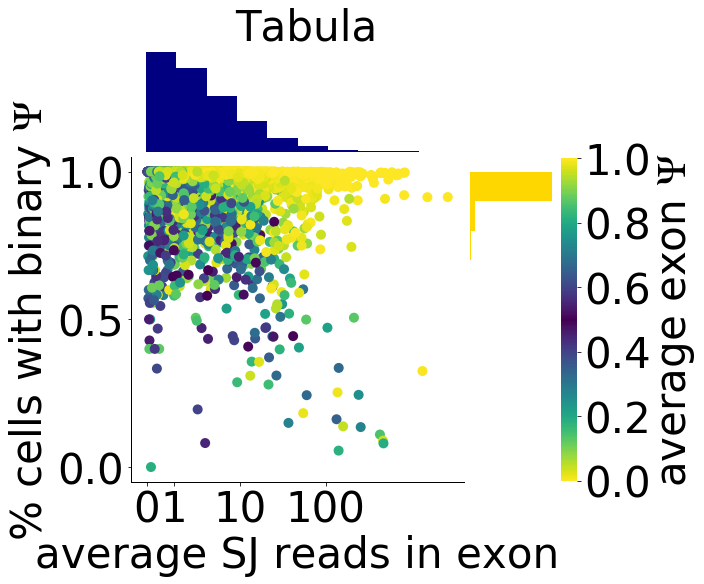

In [92]:
figsize(8,8)
xlocations=[0, 1, 10, 100]
scp.plot_ase_expression_v_binary(tabula[3], tabula[4], 'Tabula', 'tabula_all_exons', xlocations=xlocations,
                                 xlabel='average SJ reads in exon', 
                              plot_dir = 'plots/figure1/', just_show=False)
plt.show()